# <font color=red> Individual Project - Machine Learning and Statistical Models </font>

## *Machine Learning Models Benchmarking*

#### Mario Serrano 

## 1. Data Processing

In [204]:
# load information
bank <- read.csv("bank_mkt_train.csv")
str(bank)

'data.frame':	20000 obs. of  21 variables:
 $ client_id     : int  29925 37529 2757 9642 14183 15180 27168 9097 30538 28981 ...
 $ age           : int  42 35 44 45 45 38 33 38 29 34 ...
 $ job           : chr  "management" "unemployed" "technician" "services" ...
 $ marital       : chr  "married" "married" "married" "married" ...
 $ education     : chr  "basic.9y" "university.degree" "basic.9y" "high.school" ...
 $ default       : chr  "no" "no" "no" "no" ...
 $ housing       : chr  "no" "yes" "yes" "yes" ...
 $ loan          : chr  "no" "no" "yes" "no" ...
 $ contact       : chr  "cellular" "telephone" "cellular" "cellular" ...
 $ month         : chr  "jul" "jun" "may" "apr" ...
 $ day_of_week   : chr  "thu" "mon" "mon" "tue" ...
 $ campaign      : int  1 4 1 1 1 2 1 1 1 1 ...
 $ pdays         : int  999 999 999 999 999 999 NA 999 999 999 ...
 $ previous      : int  0 0 0 0 0 0 1 0 1 0 ...
 $ poutcome      : chr  "nonexistent" "nonexistent" "nonexistent" "nonexistent" ...
 $ emp.var.r

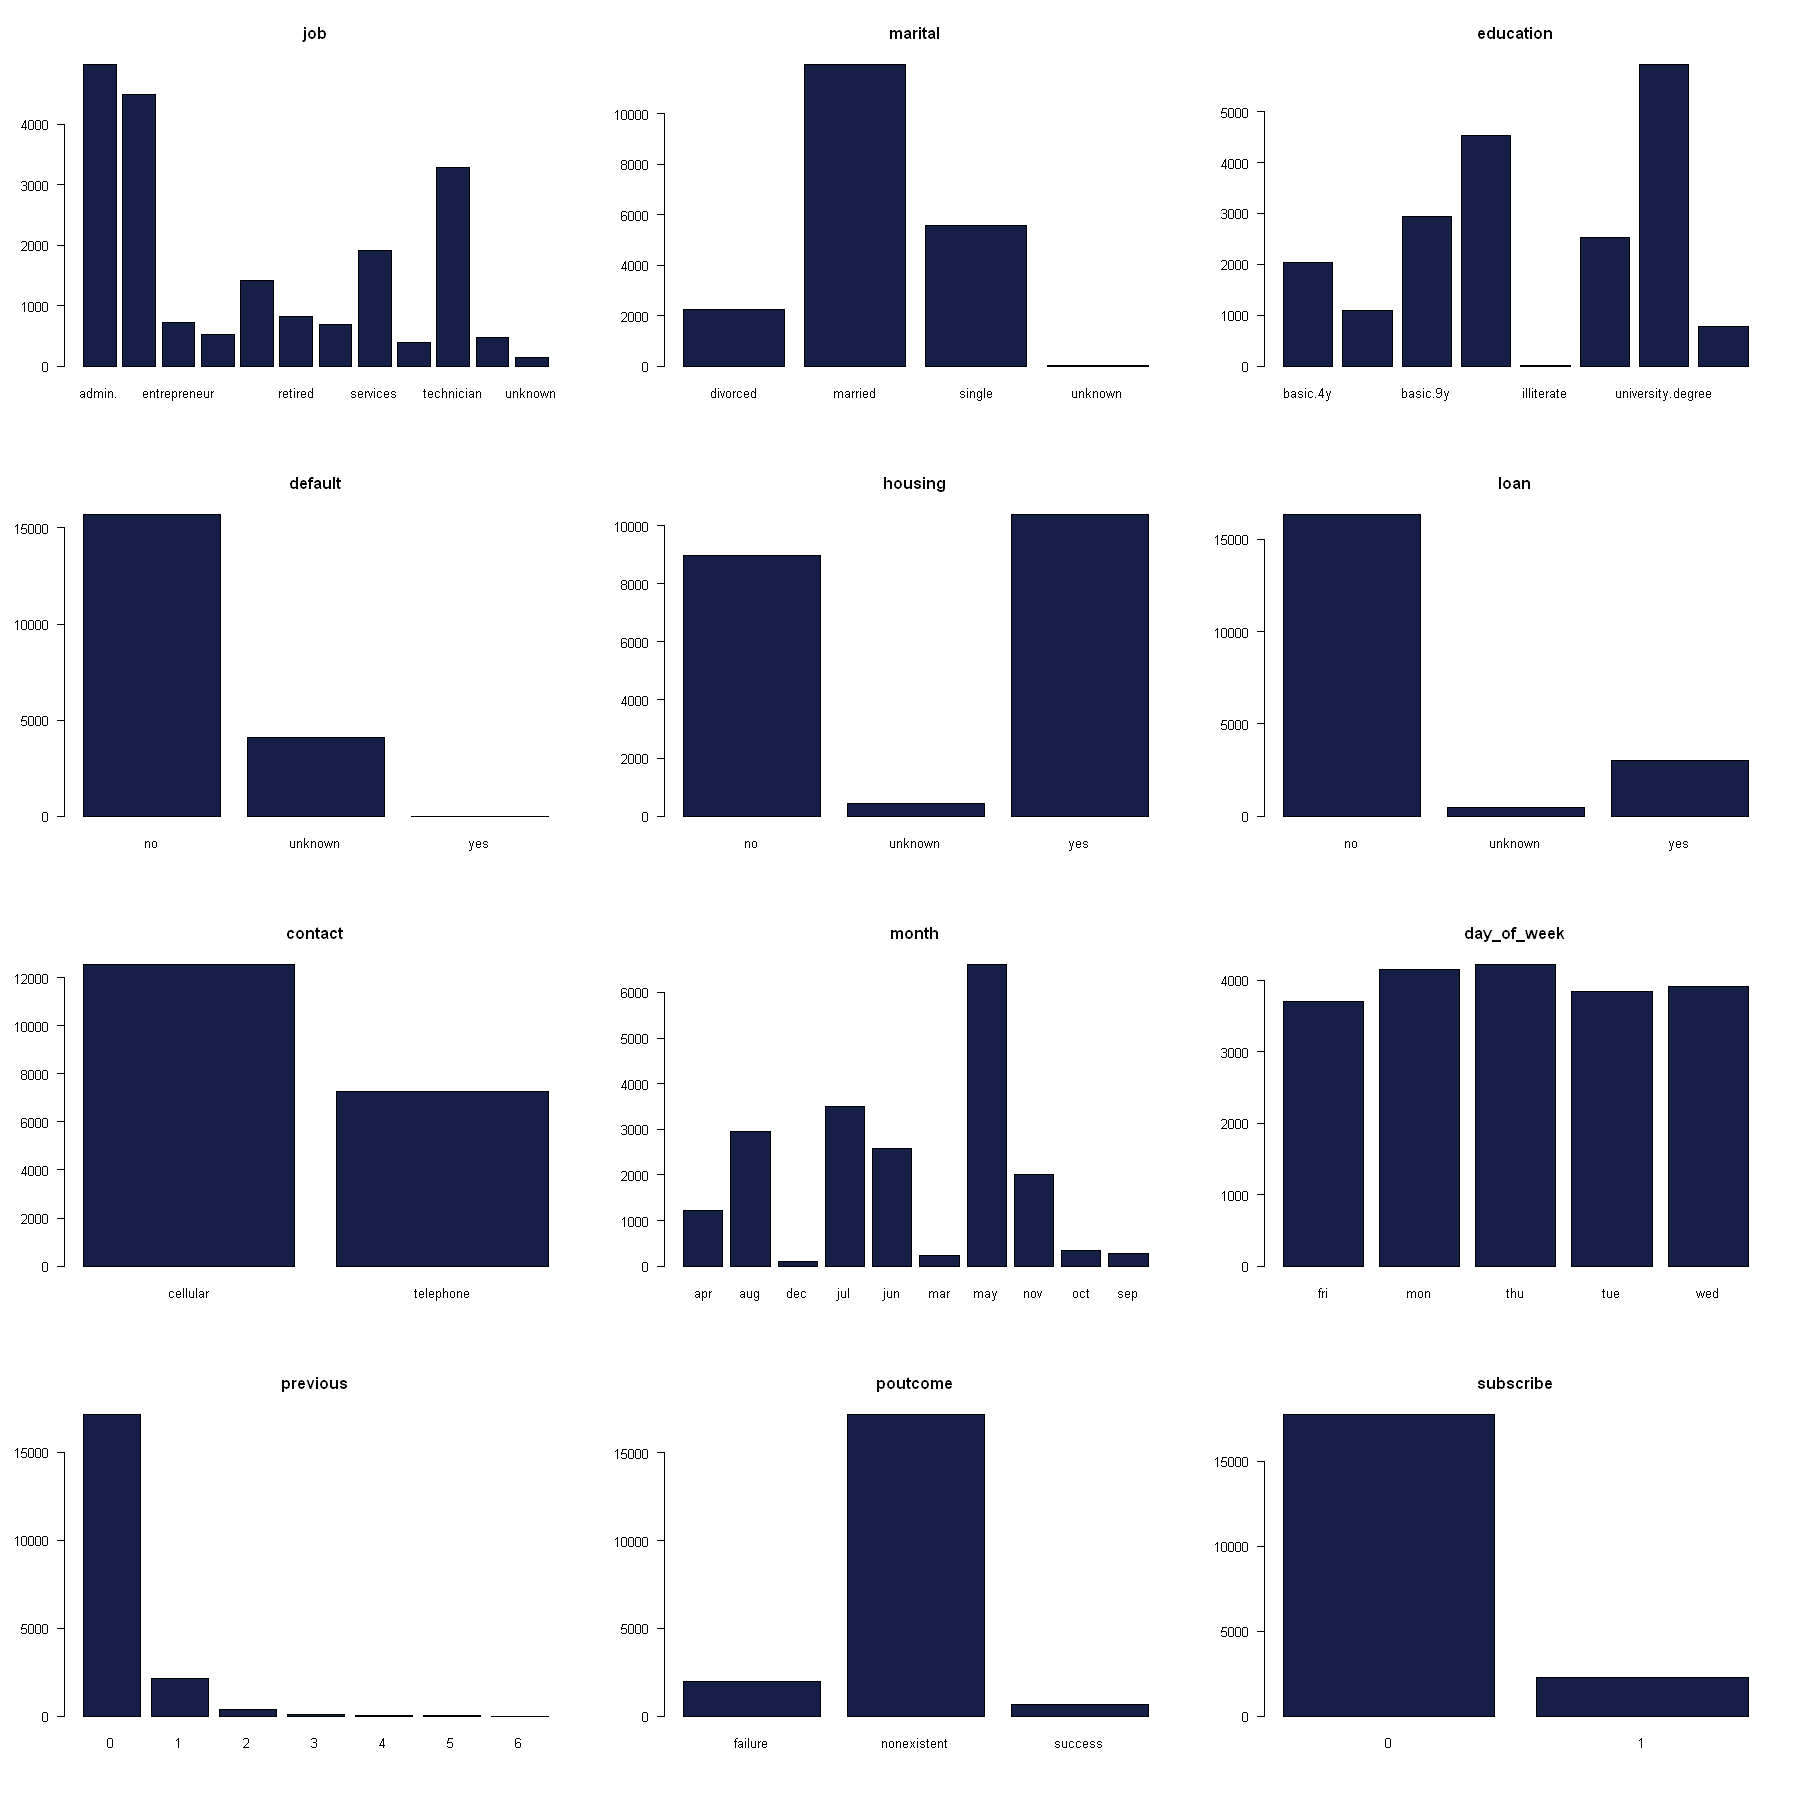

In [320]:
par(mfrow=c(4,3))
options(repr.plot.width=15, repr.plot.height=15)

for ( i in 1:ncol(bank)){
    if (class(bank[,i])=="character"|names(bank)[i]=="subscribe"){
        barplot(table(bank[,i]),col="#151f47",main=names(bank)[i],las=T)
    }
}

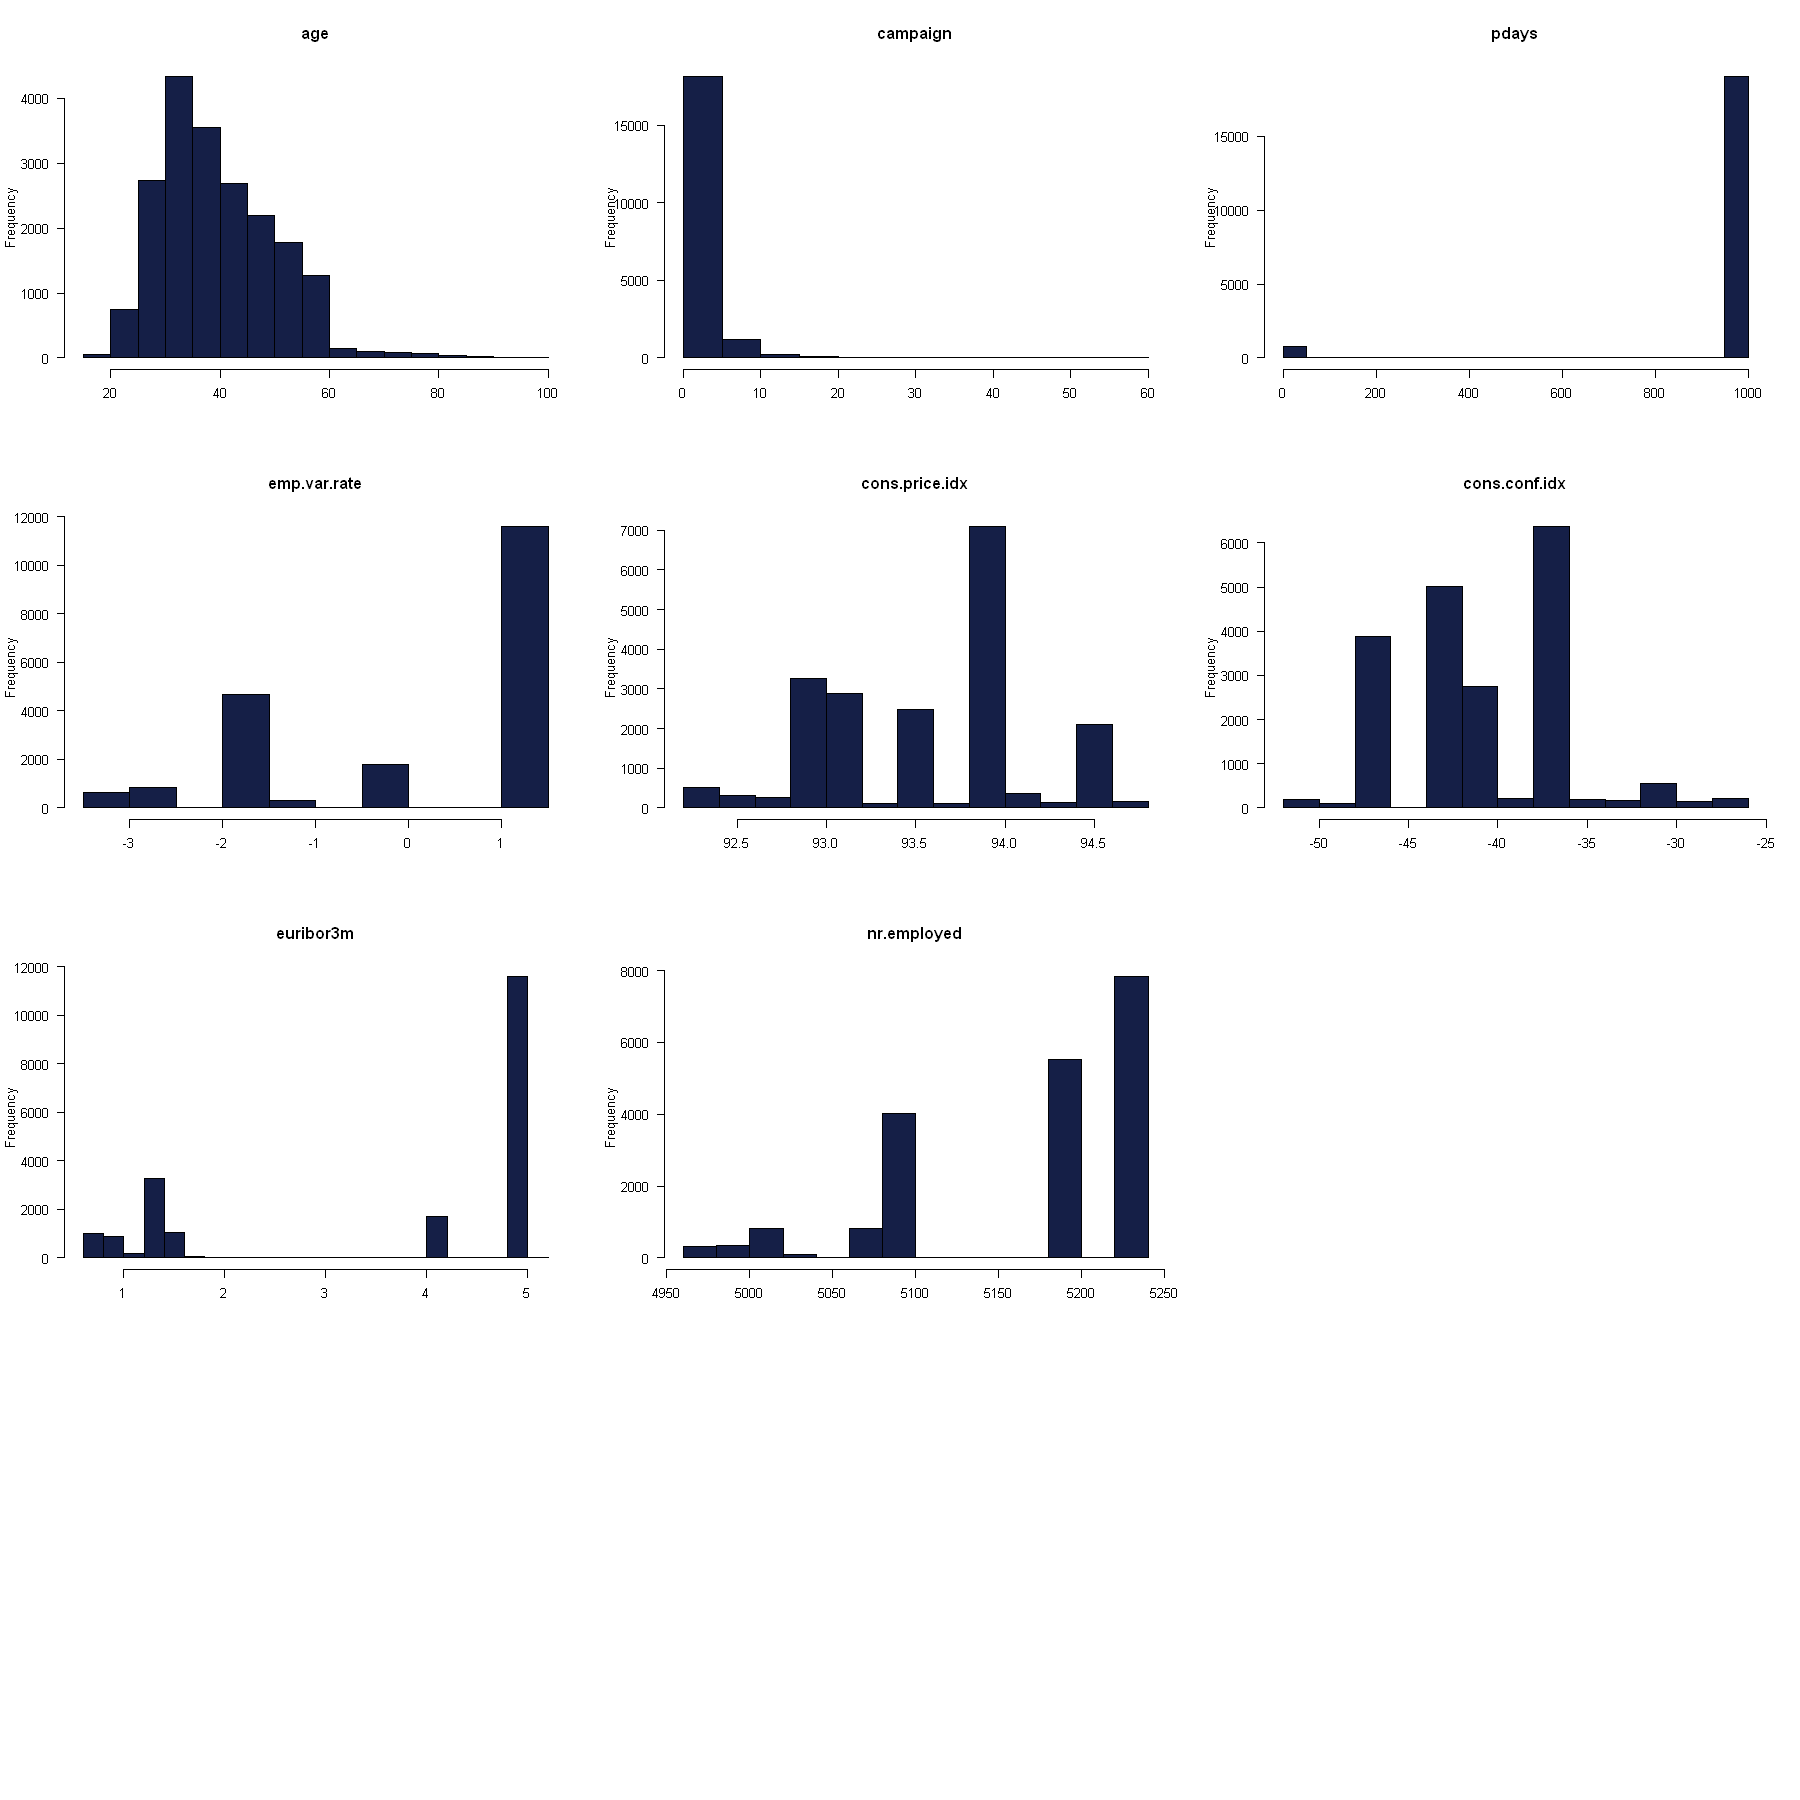

In [325]:
par(mfrow=c(4,3))
options(repr.plot.width=15, repr.plot.height=15)

for ( i in 1:ncol(bank)){
    if ((class(bank[,i])=="numeric"|class(bank[,i])=="integer")&!(names(bank)[i]=="subscribe"|names(bank)[i]=="client_id")){
        hist(bank[,i],col="#151f47",main=names(bank)[i],las=T,xlab="")
    }
}

### 1.1. Missing Values

In [332]:
table(is.na(bank))
data.frame(colSums(is.na(bank)=="TRUE"))
#treat the missing values


 FALSE   TRUE 
416336   3664 

,colSums.is.na.bank......TRUE..
,<dbl>
client_id,0
age,202
job,161
marital,199
education,170
default,214
housing,195
loan,219
contact,217


In [333]:
#store names of columns with missing values
na_cols <- names(colSums(is.na(bank)=="TRUE")[colSums(is.na(bank)=="TRUE")>0])
na_cols
#exclude pdays from this to treat it differently
na_cols<-na_cols[!na_cols=="pdays"]

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "campaign"       "pdays"         
[13] "previous"       "poutcome"       "emp.var.rate"   "cons.price.idx"
[17] "cons.conf.idx"  "euribor3m"      "nr.employed"

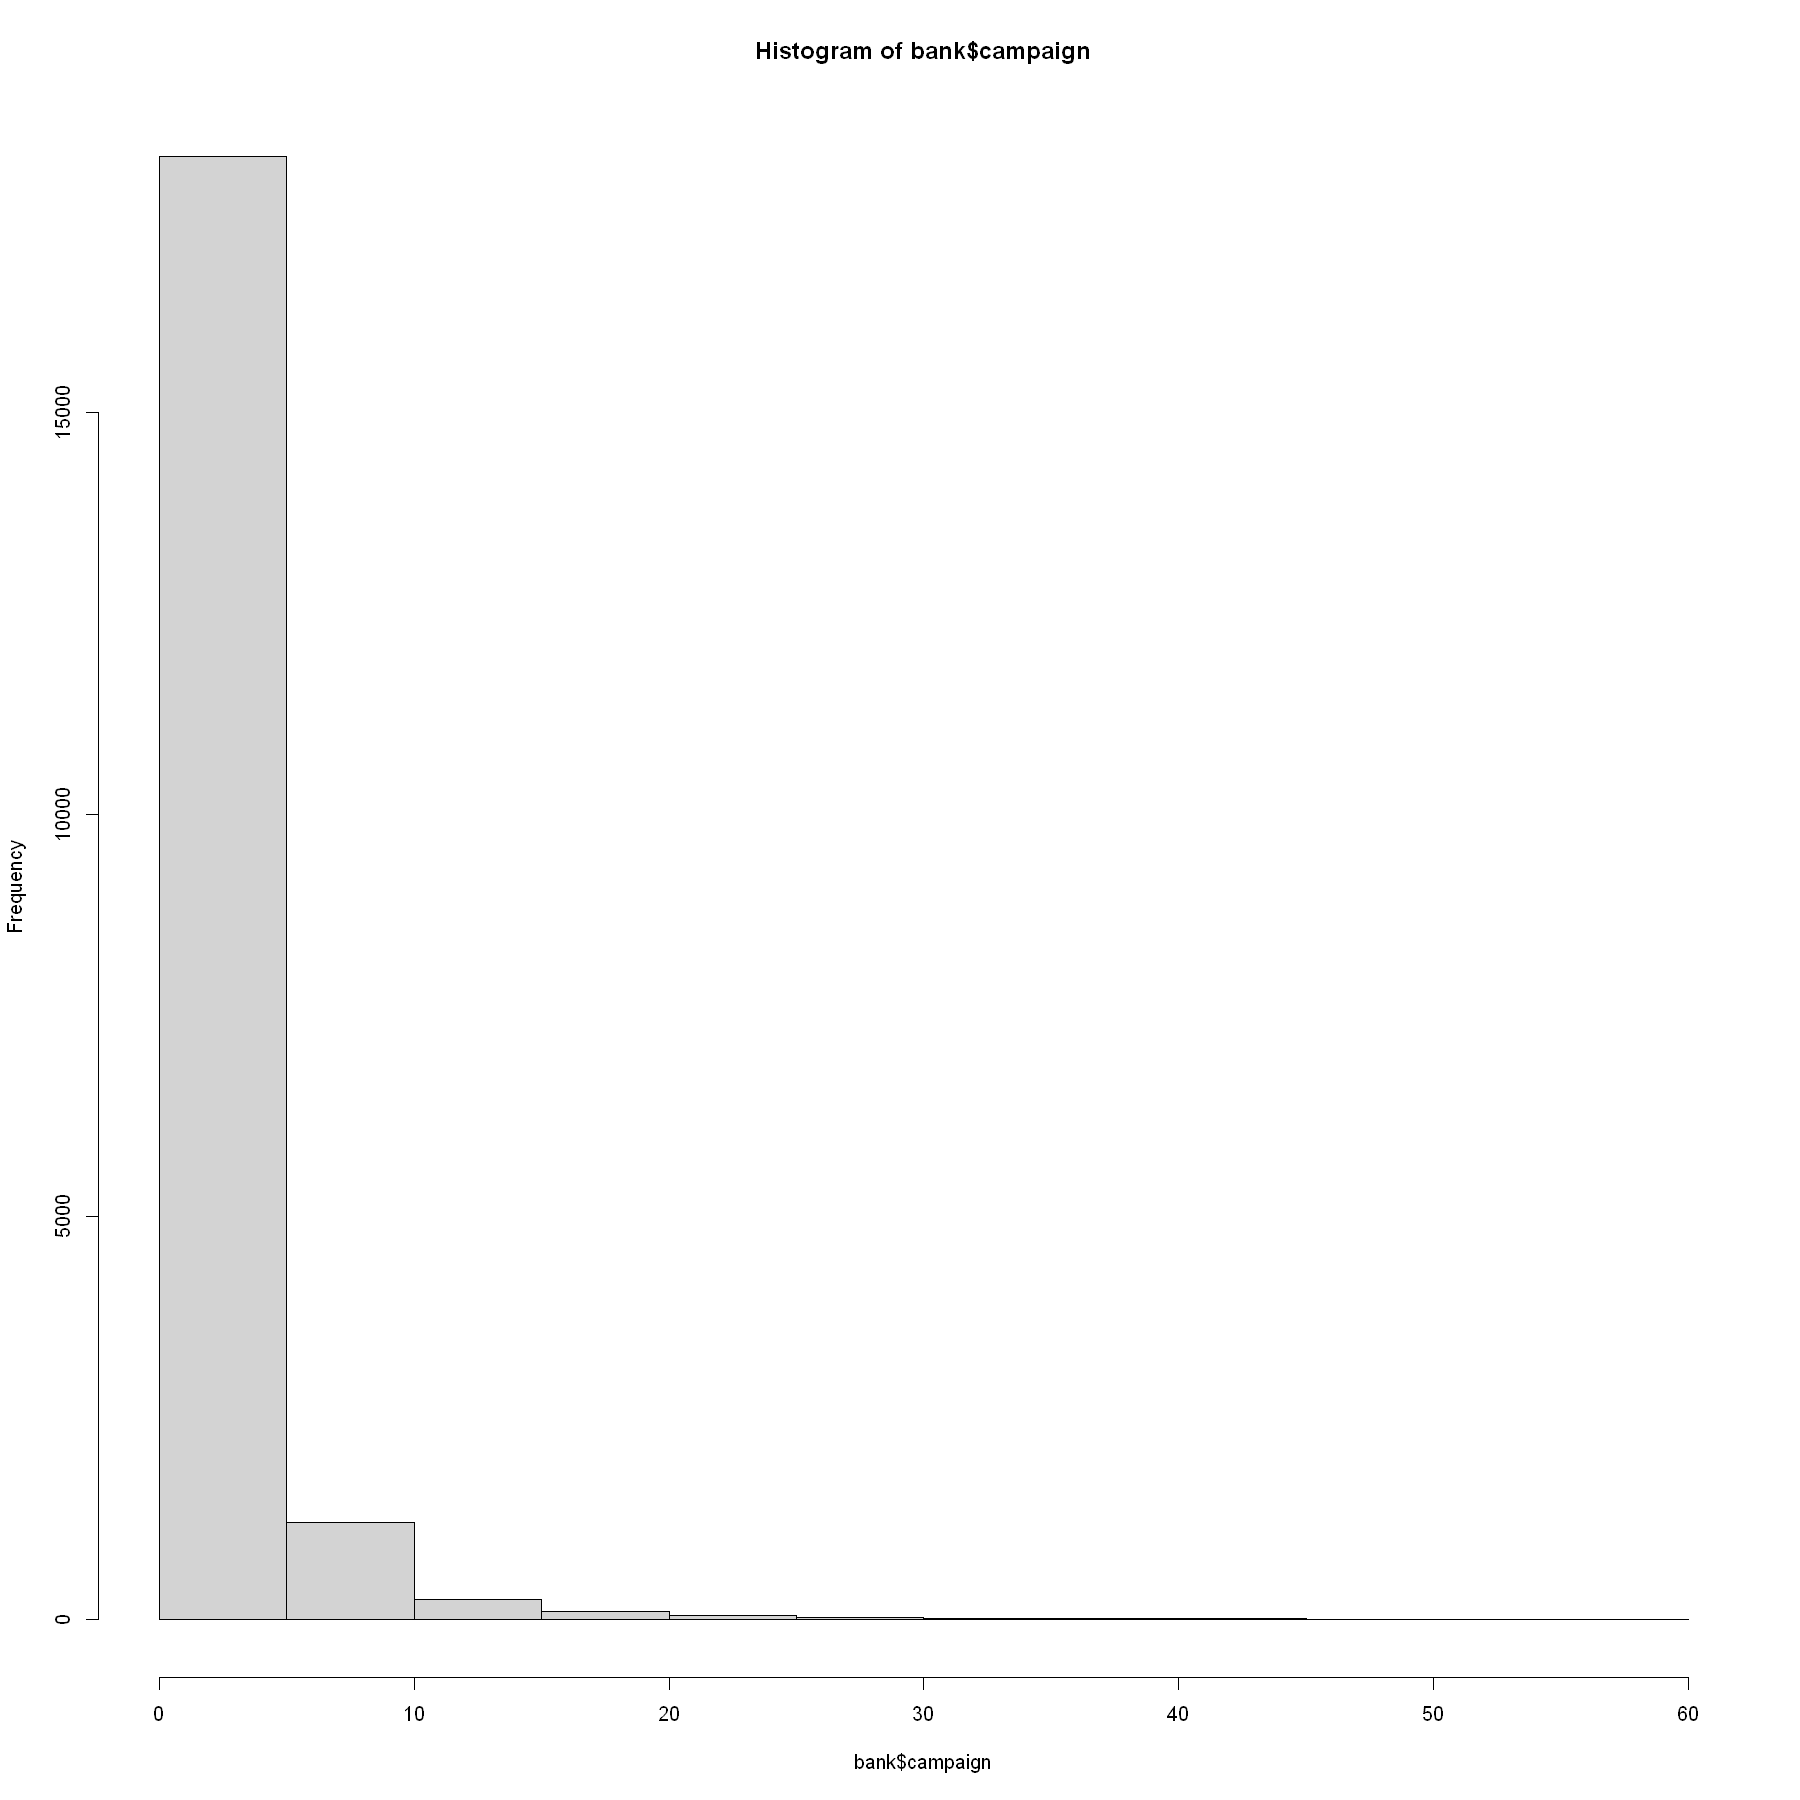

In [334]:
hist(bank$campaign)

In [335]:
table(bank$campaign)
summary(bank$campaign)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
8471 4982 2626 1292  805  466  283  195  150  104   89   63   45   33   19   24 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  30   15   10   15   12   10   12   10    3    3    4    2    5    5    1    2 
  33   34   35   39   40   41   43   56 
   2    2    1    1    1    1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    1.00    2.00    2.58    3.00   56.00     203 

In [336]:
table(bank$pdays)

table(bank$previous)
#convert to categorical

bank$previous <- as.character(bank$previous)



    0     1     2     3     4     5     6     7     8     9    10    11    12 
    8     9    30   221    62    21   209    28    11    33    27    12    27 
   13    14    15    16    17    18    19    21    22    26    27   999 
   14     7    12     5     3     4     1     1     3     1     1 19065 


    0     1     2     3     4     5     6 
17120  2152   371   103    31    12     2 

In [337]:
#create function to assign random values to NAs depending on its distribution (for categorical variables)

assign_random<- function(x,data){
    a<-(table(x)/nrow(data))
    sample(names(a),1,prob=as.numeric(a))
}

#for numeric variables only replace with the mean, since there are not many missing values

In [338]:
bank2<- bank
for (i in 1:length(na_cols)){
    if (class(bank2[,na_cols[i]])=="character"){
        bank2[,na_cols[i]]<-ifelse(is.na(bank2[,na_cols[i]]),assign_random(bank2[,na_cols[i]],bank2),bank2[,na_cols[i]])
    } else if (class(bank2[,na_cols[i]])=="integer"|class(bank2[,na_cols[i]])=="numeric"){
        bank2$missing <- ifelse(is.na(bank2[,na_cols[i]]),1,0)
        bank2[,na_cols[i]]<-ifelse(is.na(bank2[,na_cols[i]]),mean(bank2[,na_cols[i]],na.rm=T),bank2[,na_cols[i]])
        names(bank2)[which(names(bank2)=="missing")]<-paste("missing",na_cols[i],sep="_")
    }
}
colSums(is.na(bank2)=="TRUE")

client_id                    age                    job 
                     0                      0                      0 
               marital              education                default 
                     0                      0                      0 
               housing                   loan                contact 
                     0                      0                      0 
                 month            day_of_week               campaign 
                     0                      0                      0 
                 pdays               previous               poutcome 
                   185                      0                      0 
          emp.var.rate         cons.price.idx          cons.conf.idx 
                     0                      0                      0 
             euribor3m            nr.employed              subscribe 
                     0                      0                      0 
           missing_age       missing_campaign   missing_emp.var.rate 
                     0                      0                      0 
missing_cons.price.idx  missing_cons.conf.idx      missing_euribor3m 
                     0                      0                      0 
   missing_nr.employed 
                     0

In [339]:
head(bank2)

,client_id,age,job,marital,education,default,housing,loan,contact,month,⋯,euribor3m,nr.employed,subscribe,missing_age,missing_campaign,missing_emp.var.rate,missing_cons.price.idx,missing_cons.conf.idx,missing_euribor3m,missing_nr.employed
,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29925,42,management,married,basic.9y,no,no,no,cellular,jul,⋯,4.968,5228.1,0,0,0,0,0,0,0,0
2,37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,⋯,4.960,5228.1,0,0,0,0,0,0,0,0
3,2757,44,technician,married,basic.9y,no,yes,yes,cellular,may,⋯,1.264,5099.1,0,0,0,0,0,0,0,0
4,9642,45,services,married,high.school,no,yes,no,cellular,apr,⋯,1.453,5099.1,0,0,0,0,0,0,0,0
5,14183,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,⋯,4.859,5191.0,0,0,0,0,0,0,0,0
6,15180,38,technician,married,professional.course,no,no,no,telephone,may,⋯,4.858,5191.0,0,0,0,0,0,0,0,0


In [340]:
#for missing pdays, we impute with 999
table(bank2$pdays)
bank2$pdays[is.na(bank2$pdays)]<-999


    0     1     2     3     4     5     6     7     8     9    10    11    12 
    8     9    30   221    62    21   209    28    11    33    27    12    27 
   13    14    15    16    17    18    19    21    22    26    27   999 
   14     7    12     5     3     4     1     1     3     1     1 19065 

In [341]:
str(bank2)

'data.frame':	20000 obs. of  28 variables:
 $ client_id             : int  29925 37529 2757 9642 14183 15180 27168 9097 30538 28981 ...
 $ age                   : num  42 35 44 45 45 38 33 38 29 34 ...
 $ job                   : chr  "management" "unemployed" "technician" "services" ...
 $ marital               : chr  "married" "married" "married" "married" ...
 $ education             : chr  "basic.9y" "university.degree" "basic.9y" "high.school" ...
 $ default               : chr  "no" "no" "no" "no" ...
 $ housing               : chr  "no" "yes" "yes" "yes" ...
 $ loan                  : chr  "no" "no" "yes" "no" ...
 $ contact               : chr  "cellular" "telephone" "cellular" "cellular" ...
 $ month                 : chr  "jul" "jun" "may" "apr" ...
 $ day_of_week           : chr  "thu" "mon" "mon" "tue" ...
 $ campaign              : num  1 4 1 1 1 2 1 1 1 1 ...
 $ pdays                 : num  999 999 999 999 999 999 999 999 999 999 ...
 $ previous              : chr  "0" "0"

### 1.2. Outliers

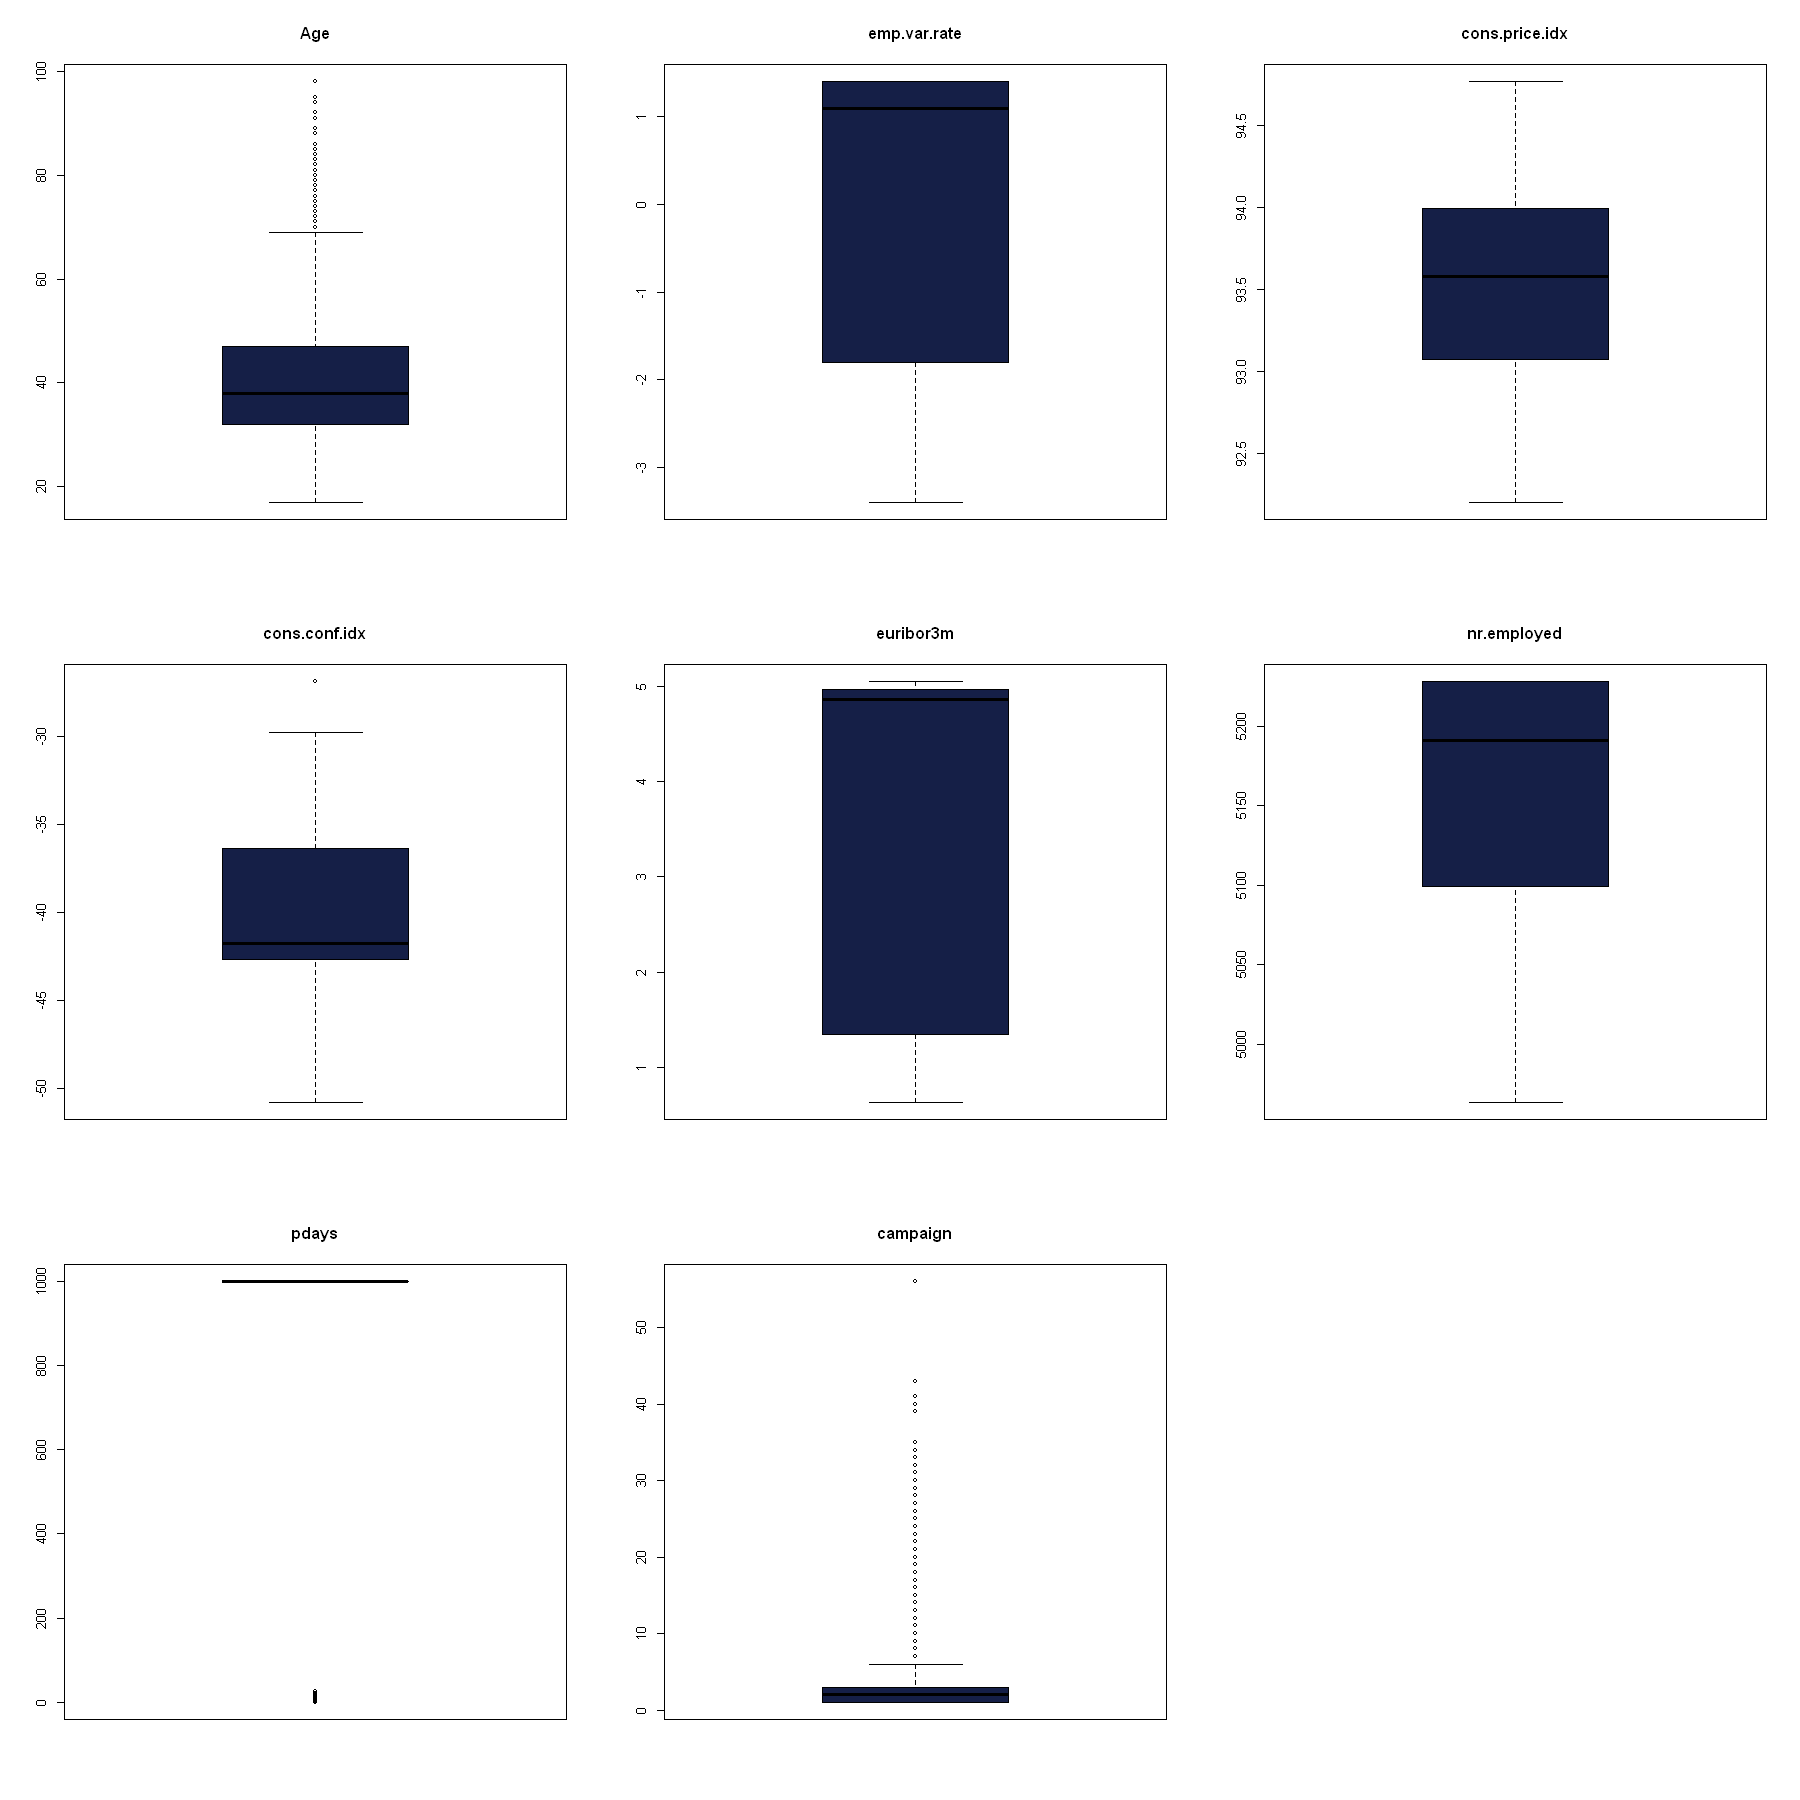

In [342]:
par(mfrow=c(3,3))
options(repr.plot.width=15, repr.plot.height=15)

boxplot(bank2$age,main="Age",col='#151f47')
boxplot(bank2$emp.var.rate,main="emp.var.rate",col='#151f47')
boxplot(bank2$cons.price.idx,main="cons.price.idx",col='#151f47')
boxplot(bank2$cons.conf.idx,main="cons.conf.idx",col='#151f47')
boxplot(bank2$euribor3m,main="euribor3m",col='#151f47')
boxplot(bank2$nr.employed,main="nr.employed",col='#151f47')
boxplot(bank2$pdays,main="pdays",col='#151f47')
boxplot(bank2$campaign,main="campaign",col='#151f47')


#looks like Age could have outliers and cons.conf.idx too 
#

[1] 71.14239

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   32.00   38.00   40.05   47.00   98.00 

99% 
 71

[1] 73 81 77 76 85 74 82 76 85 73 78 86 73 73 79 76 91 83 81 76 83 73 85 81 74
 [26] 86 81 76 76 73 74 88 72 75 73 73 92 77 80 73 78 83 74 72 77 88 74 78 75 75
 [51] 85 77 75 76 74 73 75 80 80 83 80 86 77 74 77 73 82 76 72 85 80 78 72 78 72
 [76] 84 75 86 76 78 76 80 80 80 77 83 83 72 75 73 75 74 89 73 81 79 78 80 76 72
[101] 74 88 80 72 74 73 80 82 74 72 76 84 77 86 72 72 75 80 81 80 85 85 78 80 84
[126] 76 74 80 79 88 88 80 88 82 92 73 73 81 82 82 76 76 73 75 79 72 77 78 74 78
[151] 76 88 78 81 91 73 74 82 72 78 85 75 76 73 72 76 94 72 98 72 84 72 81 88 72
[176] 76 78 82 95 86 74

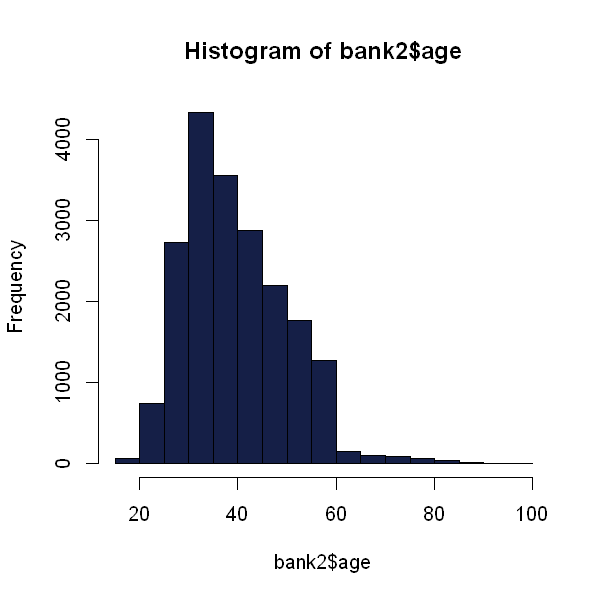

In [216]:
#check outliers in data for numeric variables

#age
library(stats)

mean(bank2$age)+sd(bank2$age)*3
summary(bank2$age)
quantile(bank2$age,0.99)

bank2$age[bank2$age>mean(bank2$age)+sd(bank2$age)*3] #we are not going to remove them or windsorize 

options(repr.plot.width=5, repr.plot.height=5)
hist(bank2$age,col="#151f47")


[1] -26.67329

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -50.80  -42.70  -41.80  -40.47  -36.40  -26.90 

99% 
-26.9

numeric(0)

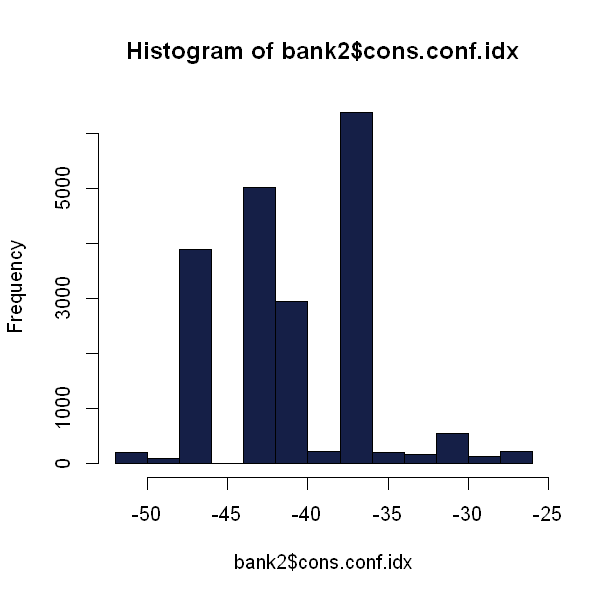

In [217]:
#cons.conf.idx

mean(bank2$cons.conf.idx)+sd(bank2$cons.conf.idx)*3
summary(bank2$cons.conf.idx)
quantile(bank2$cons.conf.idx,0.99)

bank2$age[bank2$cons.conf.idx>mean(bank2$cons.conf.idx)+sd(bank2$cons.conf.idx)*3] 
#we are not going to remove them or windsorize, since it does not look as an outlier

hist(bank2$cons.conf.idx,col="#151f47")


[1] 10.9016

[1] 5.580189

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    2.00    2.58    3.00   56.00 

99% 
 14

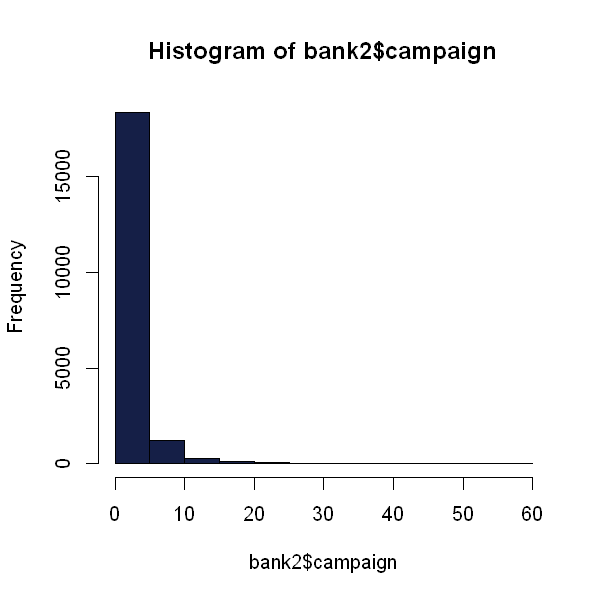

In [218]:
#campaign

mean(bank2$campaign)+sd(bank2$campaign)*3
mean(bank2$campaign)+IQR(bank2$campaign)*1.5
summary(bank2$campaign)
quantile(bank2$campaign,0.99)

#bank2$campaign[bank2$campaign>mean(bank2$campaign)+sd(bank2$campaign)*3] 
#we are  going to windsorize 

hist(bank2$campaign,col="#151f47")


[1] 9

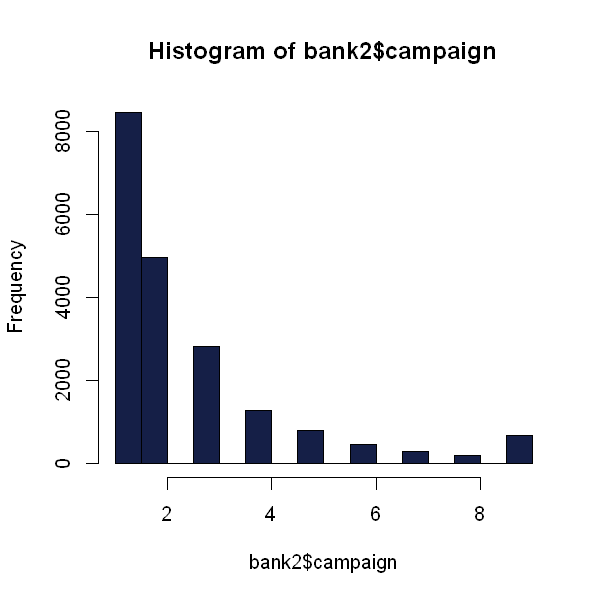

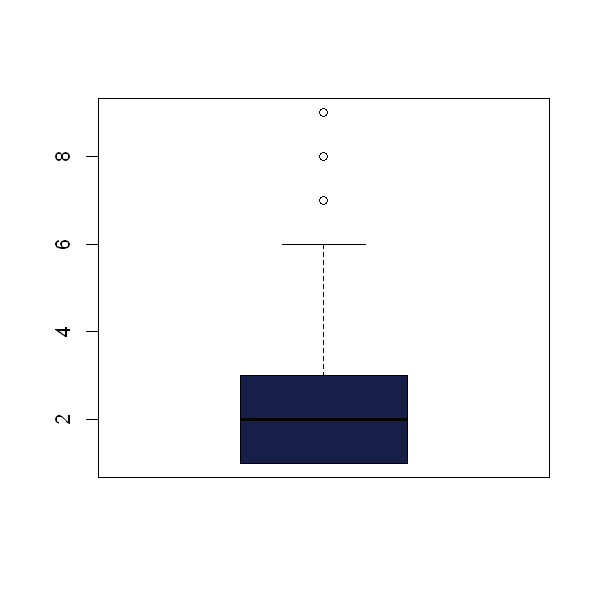

In [344]:
lim<-round(mean(bank2$campaign)+sd(bank2$campaign)*3,0)
lim

bank2$campaign<-ifelse(bank2$campaign>lim,lim,bank2$campaign)
options(repr.plot.width=5, repr.plot.height=5)

hist(bank2$campaign,col="#151f47")
boxplot(bank2$campaign,col="#151f47")

In [220]:
table(bank2$pdays)/nrow(bank2)
#most of them are 999, which means its an uncontacted client
#since 96% of the observations are uncontacted clients we are creating a new variable for pdays, 1 if not contacted, 0 if yes

bank2$contacted <- ifelse(bank2$pdays==999, 1,0)
table(bank2$contacted)

#drop pdays

bank2$pdays<-NULL


      0       1       2       3       4       5       6       7       8       9 
0.00040 0.00045 0.00150 0.01105 0.00310 0.00105 0.01045 0.00140 0.00055 0.00165 
     10      11      12      13      14      15      16      17      18      19 
0.00135 0.00060 0.00135 0.00070 0.00035 0.00060 0.00025 0.00015 0.00020 0.00005 
     21      22      26      27     999 
0.00005 0.00015 0.00005 0.00005 0.96250 


    0     1 
  750 19250 

### 1.3. Grouping categorical variables

In [221]:
for (i in 1:ncol(bank2)){
    if (class(bank2[,i])=="character"){
        print(names(bank2)[i])
        print(sort(table(bank2[,i]))/nrow(bank2))
    }
}

#group categorical variables with less than 5% of observations


[1] "job"

      unknown       student    unemployed     housemaid self-employed 
      0.00720       0.01960       0.02335       0.02620       0.03470 
 entrepreneur       retired    management      services    technician 
      0.03580       0.04145       0.07100       0.09565       0.16390 
  blue-collar        admin. 
      0.22430       0.25685 
[1] "marital"

 unknown divorced   single  married 
 0.00195  0.12300  0.27880  0.59625 
[1] "education"

         illiterate             unknown            basic.6y            basic.4y 
            0.00045             0.03890             0.05500             0.10195 
professional.course            basic.9y         high.school   university.degree 
            0.12600             0.14710             0.22630             0.30430 
[1] "default"

    yes unknown      no 
0.00010 0.21615 0.78375 
[1] "housing"

unknown      no     yes 
0.02245 0.44935 0.52820 
[1] "loan"

unknown     yes      no 
0.02255 0.15070 0.82675 
[1] "contact"

telephone 

In [222]:
#job<- entrepreneur, housemaid, retired, self-employed, student, unemployed, unknown
#education <- illiterate, unknown
#campaign <- any other that is not 4,3,2,1
#previous <- convert to numeric

bank2$job<-ifelse(bank2$job%in%c("entrepreneur", "housemaid", "retired", "self-employed", "student", "unemployed", "unknown"),
                 "others",bank2$job)
table(bank2$job)


     admin. blue-collar  management      others    services  technician 
       5137        4486        1420        3766        1913        3278 

In [223]:
bank2$education<-ifelse(bank2$education%in%c("illiterate", "unknown"),
                 "others",bank2$education)
table(bank2$education)


           basic.4y            basic.6y            basic.9y         high.school 
               2039                1100                2942                4526 
             others professional.course   university.degree 
                787                2520                6086 

In [224]:
bank2$previous<-as.numeric(bank2$previous)
table(bank2$previous)


    0     1     2     3     4     5     6 
17329  2152   371   103    31    12     2 

In [225]:
#drop client id

bank2$client_id<-NULL

### 1.4. Get Dummies for Categorical Variables

In [226]:
char_cols<-vector()
for (i in 1:ncol(bank2)){if(class(bank2[,i])=="character"){char_cols=append(i,char_cols)}}
char_cols
names(bank2)[char_cols]

[1] 13 10  9  8  7  6  5  4  3  2

[1] "poutcome"    "day_of_week" "month"       "contact"     "loan"       
 [6] "housing"     "default"     "education"   "marital"     "job"

In [227]:
#install.packages("fastDummies")
library(fastDummies)

bank_dum<-dummy_cols(bank2[,char_cols],remove_first_dummy = TRUE,remove_selected_columns = TRUE)
bank_nc<-cbind(bank2[,-char_cols],bank_dum)
head(bank_nc)

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,missing_age,⋯,education_professional.course,education_university.degree,marital_married,marital_single,marital_unknown,job_blue-collar,job_management,job_others,job_services,job_technician
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,42,1,0,1.4,93.918,-42.7,4.968,5228.1,0,0,⋯,0,0,1,0,0,0,1,0,0,0
2,35,4,0,1.4,94.465,-41.8,4.960,5228.1,0,0,⋯,0,1,1,0,0,0,0,1,0,0
3,44,1,0,-1.8,92.893,-46.2,1.264,5099.1,0,0,⋯,0,0,1,0,0,0,0,0,0,1
4,45,1,0,-1.8,93.075,-47.1,1.453,5099.1,0,0,⋯,0,0,1,0,0,0,0,0,1,0
5,45,1,0,1.1,93.994,-36.4,4.859,5191.0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
6,38,2,0,1.1,93.994,-36.4,4.858,5191.0,0,0,⋯,1,0,1,0,0,0,0,0,0,1


In [228]:
names(bank_nc)[which(names(bank_nc)=="job_blue-collar")]<-"job_blue_collar"

In [229]:
names(bank_nc)

[1] "age"                           "campaign"                     
 [3] "previous"                      "emp.var.rate"                 
 [5] "cons.price.idx"                "cons.conf.idx"                
 [7] "euribor3m"                     "nr.employed"                  
 [9] "subscribe"                     "missing_age"                  
[11] "missing_campaign"              "missing_emp.var.rate"         
[13] "missing_cons.price.idx"        "missing_cons.conf.idx"        
[15] "missing_euribor3m"             "missing_nr.employed"          
[17] "contacted"                     "poutcome_nonexistent"         
[19] "poutcome_success"              "day_of_week_mon"              
[21] "day_of_week_thu"               "day_of_week_tue"              
[23] "day_of_week_wed"               "month_aug"                    
[25] "month_dec"                     "month_jul"                    
[27] "month_jun"                     "month_mar"                    
[29] "month_may"                     "month_nov"                    
[31] "month_oct"                     "month_sep"                    
[33] "contact_telephone"             "loan_unknown"                 
[35] "loan_yes"                      "housing_unknown"              
[37] "housing_yes"                   "default_unknown"              
[39] "default_yes"                   "education_basic.6y"           
[41] "education_basic.9y"            "education_high.school"        
[43] "education_others"              "education_professional.course"
[45] "education_university.degree"   "marital_married"              
[47] "marital_single"                "marital_unknown"              
[49] "job_blue_collar"               "job_management"               
[51] "job_others"                    "job_services"                 
[53] "job_technician"

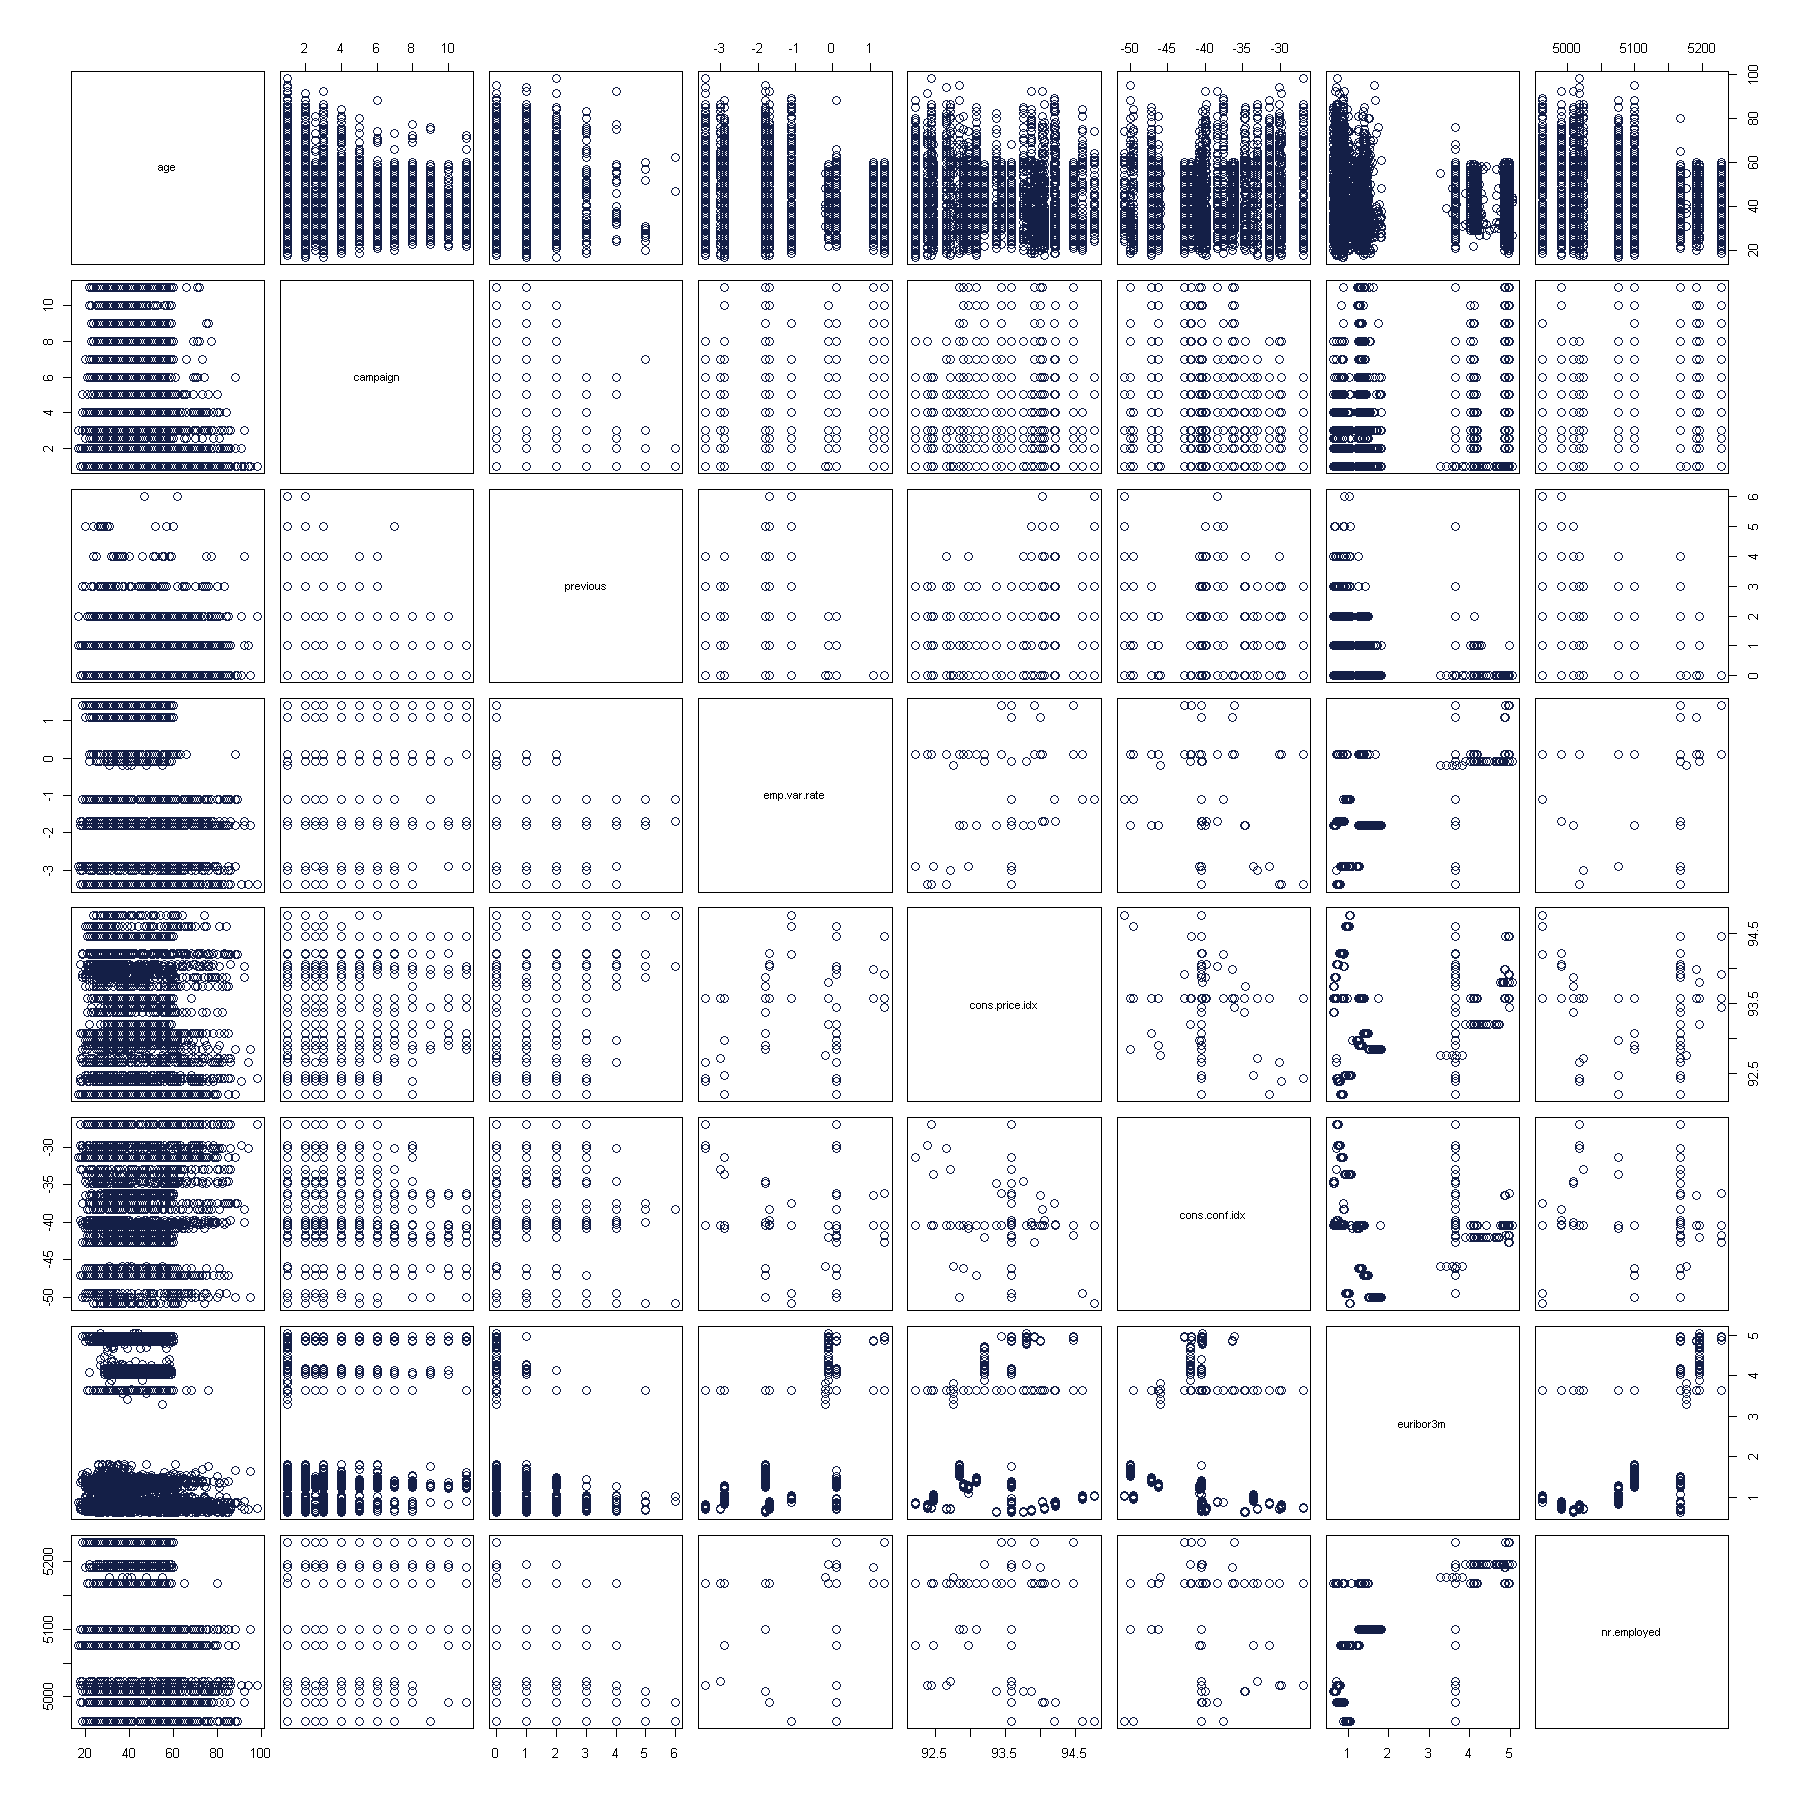

In [236]:
options(repr.plot.width=15, repr.plot.height=15)
pairs(bank_nc[,c(1:8)],col="#141f47",cex=1.5)

### 1.5. Train and Test

In [237]:
#split with 80/20

#this train and test is for the set with dummies
set.seed(42)
rtrain<-sample(nrow(bank_nc),nrow(bank_nc)*0.8)
train <- bank_nc[rtrain,]
test <- bank_nc[-rtrain,]

nrow(train);nrow(test)
nrow(train)+nrow(test) == nrow(bank_nc)


[1] 16000

[1] 4000

[1] TRUE

In [238]:
head(train)

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,missing_age,⋯,education_professional.course,education_university.degree,marital_married,marital_single,marital_unknown,job_blue_collar,job_management,job_others,job_services,job_technician
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
18753,35,1,0,-0.1,93.200,-42.00000,4.076,5195.8,0,0,⋯,0,0,0,1,0,1,0,0,0,0
9290,51,1,0,1.4,94.465,-41.80000,4.967,5228.1,0,0,⋯,1,0,1,0,0,0,0,0,0,1
1252,37,8,1,-1.8,92.893,-40.47166,1.299,5099.1,0,0,⋯,0,0,1,0,0,1,0,0,0,0
15506,34,1,0,1.1,93.994,-36.40000,4.858,5191.0,0,0,⋯,0,0,1,0,0,1,0,0,0,0
8826,41,2,0,1.4,94.465,-41.80000,4.962,5228.1,0,0,⋯,0,0,1,0,0,0,0,0,1,0
10289,48,1,0,1.4,94.465,-41.80000,4.865,5228.1,0,0,⋯,0,0,1,0,0,1,0,0,0,0


In [239]:
#convert bank2 characters to factors
for (i in 1:ncol(bank2)){
    if (class(bank2[,i])=="character"){
        bank2[,i]<-as.factor(bank2[,i])
    }
}

In [240]:
#split with 80/20
names(bank2)[which(names(bank2)=="job_blue-collar")]<-"job_blue_collar"

#change contacted variable for set without dummies
bank2$contacted<-ifelse(bank2$contacted==1,"no","yes")
bank2$contacted<-as.factor(bank2$contacted)
#this train and test is for the set without dummies
set.seed(42)
rtrain<-sample(nrow(bank2),nrow(bank2)*0.8)
train_nd <- bank2[rtrain,]
test_nd <- bank2[-rtrain,]

nrow(train_nd);nrow(test_nd)
nrow(train_nd)+nrow(test_nd) == nrow(bank2)


[1] 16000

[1] 4000

[1] TRUE

In [241]:
head(train_nd)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,nr.employed,subscribe,missing_age,missing_campaign,missing_emp.var.rate,missing_cons.price.idx,missing_cons.conf.idx,missing_euribor3m,missing_nr.employed,contacted
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
18753,35,blue-collar,single,basic.6y,no,no,no,cellular,nov,thu,⋯,5195.8,0,0,0,0,0,0,0,0,no
9290,51,technician,married,professional.course,unknown,yes,no,telephone,jun,fri,⋯,5228.1,0,0,0,0,0,0,0,0,no
1252,37,blue-collar,married,basic.9y,no,no,no,cellular,sep,mon,⋯,5099.1,0,0,0,0,0,1,0,0,no
15506,34,blue-collar,married,basic.9y,unknown,yes,yes,telephone,sep,wed,⋯,5191.0,0,0,0,0,0,0,0,0,no
8826,41,services,married,basic.9y,no,yes,no,telephone,jun,wed,⋯,5228.1,0,0,0,0,0,0,0,0,no
10289,48,blue-collar,married,basic.4y,no,yes,no,telephone,jun,mon,⋯,5228.1,0,0,0,0,0,0,0,0,no


In [373]:
#base table with scaled variables
bank_nc_s<-bank_nc

#vars to scale

vars <- c("age","emp.var.rate","cons.price.idx","euribor3m","nr.employed","campaign")

for (i in which(names(bank_nc_s)%in%vars)){
    bank_nc_s[,i]<-as.numeric(scale(bank_nc_s[,i]))
}

In [374]:
#this train and test is for the set scaled
set.seed(42)
rtrain<-sample(nrow(bank_nc_s),nrow(bank_nc_s)*0.8)
train_s <- bank_nc_s[rtrain,]
test_s <- bank_nc_s[-rtrain,]

nrow(train_s);nrow(test_s)
nrow(train_s)+nrow(test_s) == nrow(bank_nc_s)


[1] 16000

[1] 4000

[1] TRUE

In [375]:
head(train_s)

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,missing_age,⋯,education_professional.course,education_university.degree,marital_married,marital_single,marital_unknown,job_blue_collar,job_management,job_others,job_services,job_technician
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
18753,-0.48771692,-0.6971742,0,-0.1202879,-0.6516842,-42.00000,0.2574970,0.3957261,0,0,⋯,0,0,0,1,0,1,0,0,0,0
9290,1.05627238,-0.6971742,0,0.8372168,1.5393696,-41.80000,0.7749144,0.8447988,0,0,⋯,1,0,1,0,0,0,0,0,0,1
1252,-0.29471826,2.6215992,1,-1.2054599,-1.1834261,-40.47166,-1.3551496,-0.9487115,0,0,⋯,0,0,1,0,0,1,0,0,0,0
15506,-0.58421625,-0.6971742,0,0.6457159,0.7235701,-36.40000,0.7116164,0.3289908,0,0,⋯,0,0,1,0,0,1,0,0,0,0
8826,0.09127907,-0.2230637,0,0.8372168,1.5393696,-41.80000,0.7720108,0.8447988,0,0,⋯,0,0,1,0,0,0,0,0,1,0
10289,0.76677438,-0.6971742,0,0.8372168,1.5393696,-41.80000,0.7156814,0.8447988,0,0,⋯,0,0,1,0,0,1,0,0,0,0


## 2. Model Building


In [246]:
#target variable
table(train$subscribe)
table(test$subscribe)


    0     1 
14169  1831 


   0    1 
3560  440 

### 2.1. Logistic Model

In [247]:
log_mod <- glm(subscribe~.,data=train,family="binomial")
summary(log_mod)


Call:
glm(formula = subscribe ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1545  -0.3968  -0.3257  -0.2609   2.9141  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -17.485741  25.102527  -0.697 0.486070    
age                             0.003119   0.002876   1.084 0.278149    
campaign                       -0.045371   0.016306  -2.782 0.005396 ** 
previous                        0.006613   0.087196   0.076 0.939549    
emp.var.rate                   -0.365700   0.109357  -3.344 0.000826 ***
cons.price.idx                  0.440124   0.174677   2.520 0.011747 *  
cons.conf.idx                   0.017611   0.008403   2.096 0.036098 *  
euribor3m                      -0.054361   0.098546  -0.552 0.581200    
nr.employed                    -0.004681   0.002015  -2.323 0.020160 *  
missing_age                     0.001230   0.285440   0.004 0.996562  

### Stepwise selection

In [248]:
library(MASS)

#variable selection using stepwise
step_log <- stepAIC(log_mod,direction="backward")
step_log$anova

Start:  AIC=9052.03
subscribe ~ age + campaign + previous + emp.var.rate + cons.price.idx + 
    cons.conf.idx + euribor3m + nr.employed + missing_age + missing_campaign + 
    missing_emp.var.rate + missing_cons.price.idx + missing_cons.conf.idx + 
    missing_euribor3m + missing_nr.employed + contacted + poutcome_nonexistent + 
    poutcome_success + day_of_week_mon + day_of_week_thu + day_of_week_tue + 
    day_of_week_wed + month_aug + month_dec + month_jul + month_jun + 
    month_mar + month_may + month_nov + month_oct + month_sep + 
    contact_telephone + loan_unknown + loan_yes + housing_unknown + 
    housing_yes + default_unknown + default_yes + education_basic.6y + 
    education_basic.9y + education_high.school + education_others + 
    education_professional.course + education_university.degree + 
    marital_married + marital_single + marital_unknown + job_blue_collar + 
    job_management + job_others + job_services + job_technician

                                Df D

                                Df Deviance    AIC
- education_university.degree    1   8946.0 9046.0
- job_technician                 1   8946.0 9046.0
- previous                       1   8946.0 9046.0
- day_of_week_wed                1   8946.0 9046.0
- loan_yes                       1   8946.1 9046.1
- marital_married                1   8946.1 9046.1
- month_sep                      1   8946.1 9046.1
- housing_unknown                1   8946.1 9046.1
- education_professional.course  1   8946.1 9046.1
- loan_unknown                   1   8946.1 9046.1
- education_basic.9y             1   8946.1 9046.1
- default_yes                    1   8946.2 9046.2
- missing_campaign               1   8946.2 9046.2
- missing_cons.conf.idx          1   8946.2 9046.2
- missing_emp.var.rate           1   8946.3 9046.3
- education_others               1   8946.3 9046.3
- euribor3m                      1   8946.3 9046.3
- education_high.school          1   8946.4 9046.4
- month_oct                    


Step:  AIC=9042.04
subscribe ~ age + campaign + emp.var.rate + cons.price.idx + 
    cons.conf.idx + euribor3m + nr.employed + missing_campaign + 
    missing_emp.var.rate + missing_cons.price.idx + missing_cons.conf.idx + 
    missing_euribor3m + missing_nr.employed + contacted + poutcome_nonexistent + 
    poutcome_success + day_of_week_mon + day_of_week_thu + day_of_week_wed + 
    month_aug + month_dec + month_jul + month_jun + month_mar + 
    month_may + month_nov + month_oct + month_sep + contact_telephone + 
    loan_unknown + loan_yes + housing_unknown + housing_yes + 
    default_unknown + default_yes + education_basic.6y + education_basic.9y + 
    education_high.school + education_others + education_professional.course + 
    marital_married + marital_single + marital_unknown + job_blue_collar + 
    job_management + job_others + job_services

                                Df Deviance    AIC
- day_of_week_wed                1   8946.1 9040.1
- loan_yes                   


Step:  AIC=9036.13
subscribe ~ age + campaign + emp.var.rate + cons.price.idx + 
    cons.conf.idx + euribor3m + nr.employed + missing_campaign + 
    missing_emp.var.rate + missing_cons.price.idx + missing_cons.conf.idx + 
    missing_euribor3m + missing_nr.employed + contacted + poutcome_nonexistent + 
    poutcome_success + day_of_week_mon + day_of_week_thu + month_aug + 
    month_dec + month_jul + month_jun + month_mar + month_may + 
    month_nov + month_oct + month_sep + contact_telephone + loan_unknown + 
    housing_unknown + housing_yes + default_unknown + default_yes + 
    education_basic.6y + education_basic.9y + education_high.school + 
    education_others + education_professional.course + marital_single + 
    marital_unknown + job_blue_collar + job_management + job_others + 
    job_services

                                Df Deviance    AIC
- month_sep                      1   8946.2 9034.2
- housing_unknown                1   8946.2 9034.2
- loan_unknown           


Step:  AIC=9030.25
subscribe ~ age + campaign + emp.var.rate + cons.price.idx + 
    cons.conf.idx + euribor3m + nr.employed + missing_campaign + 
    missing_emp.var.rate + missing_cons.price.idx + missing_cons.conf.idx + 
    missing_euribor3m + missing_nr.employed + contacted + poutcome_nonexistent + 
    poutcome_success + day_of_week_mon + day_of_week_thu + month_aug + 
    month_dec + month_jul + month_jun + month_mar + month_may + 
    month_nov + month_oct + contact_telephone + housing_yes + 
    default_unknown + default_yes + education_basic.6y + education_basic.9y + 
    education_high.school + education_others + education_professional.course + 
    marital_single + marital_unknown + job_blue_collar + job_management + 
    job_others + job_services

                                Df Deviance    AIC
- education_professional.course  1   8946.4 9028.4
- education_basic.9y             1   8946.4 9028.4
- missing_campaign               1   8946.5 9028.5
- default_yes           

                         Df Deviance    AIC
- missing_cons.conf.idx   1   8947.0 9023.0
- missing_emp.var.rate    1   8947.0 9023.0
- education_basic.9y      1   8947.0 9023.0
- month_oct               1   8947.1 9023.1
- marital_unknown         1   8947.2 9023.2
- euribor3m               1   8947.2 9023.2
- education_others        1   8947.2 9023.2
- missing_euribor3m       1   8947.3 9023.3
- missing_cons.price.idx  1   8947.4 9023.4
- day_of_week_thu         1   8947.4 9023.4
- job_management          1   8947.5 9023.5
- education_basic.6y      1   8947.6 9023.6
- month_jun               1   8947.6 9023.6
- job_services            1   8947.7 9023.7
- missing_nr.employed     1   8947.8 9023.8
- education_high.school   1   8947.9 9023.9
- housing_yes             1   8947.9 9023.9
- age                     1   8948.0 9024.0
- month_aug               1   8948.1 9024.1
- job_others              1   8948.1 9024.1
- month_dec               1   8948.5 9024.5
<none>                        89


Step:  AIC=9017.78
subscribe ~ age + campaign + emp.var.rate + cons.price.idx + 
    cons.conf.idx + euribor3m + nr.employed + missing_cons.price.idx + 
    missing_euribor3m + missing_nr.employed + contacted + poutcome_nonexistent + 
    poutcome_success + day_of_week_mon + day_of_week_thu + month_aug + 
    month_dec + month_jul + month_jun + month_mar + month_may + 
    month_nov + month_oct + contact_telephone + housing_yes + 
    default_unknown + education_basic.6y + education_high.school + 
    marital_single + marital_unknown + job_blue_collar + job_management + 
    job_others + job_services

                         Df Deviance    AIC
- month_oct               1   8948.1 9016.1
- marital_unknown         1   8948.2 9016.2
- euribor3m               1   8948.2 9016.2
- missing_euribor3m       1   8948.3 9016.3
- education_basic.6y      1   8948.4 9016.4
- missing_cons.price.idx  1   8948.4 9016.4
- day_of_week_thu         1   8948.4 9016.4
- job_management          1   8948.5 9


Step:  AIC=9011.64
subscribe ~ age + campaign + emp.var.rate + cons.price.idx + 
    cons.conf.idx + euribor3m + nr.employed + missing_euribor3m + 
    missing_nr.employed + contacted + poutcome_nonexistent + 
    poutcome_success + day_of_week_mon + day_of_week_thu + month_aug + 
    month_dec + month_jul + month_jun + month_mar + month_may + 
    month_nov + contact_telephone + housing_yes + default_unknown + 
    education_high.school + marital_single + job_blue_collar + 
    job_management + job_others + job_services

                        Df Deviance    AIC
- euribor3m              1   8950.3 9010.3
- missing_euribor3m      1   8950.3 9010.3
- day_of_week_thu        1   8950.3 9010.3
- education_high.school  1   8950.3 9010.3
- job_services           1   8950.4 9010.4
- job_management         1   8950.4 9010.4
- month_jun              1   8950.7 9010.7
- housing_yes            1   8950.7 9010.7
- age                    1   8950.8 9010.8
- missing_nr.employed    1   8950.8 9010.


Step:  AIC=9004.23
subscribe ~ age + campaign + emp.var.rate + cons.price.idx + 
    cons.conf.idx + nr.employed + missing_nr.employed + contacted + 
    poutcome_nonexistent + poutcome_success + day_of_week_mon + 
    month_aug + month_dec + month_jul + month_jun + month_mar + 
    month_may + month_nov + contact_telephone + housing_yes + 
    default_unknown + marital_single + job_blue_collar + job_management + 
    job_others

                       Df Deviance    AIC
- job_management        1   8953.0 9003.0
- missing_nr.employed   1   8953.2 9003.2
- age                   1   8953.3 9003.3
- housing_yes           1   8953.4 9003.4
- month_jun             1   8953.5 9003.5
<none>                      8952.2 9004.2
- month_dec             1   8954.3 9004.3
- job_others            1   8954.3 9004.3
- month_aug             1   8954.7 9004.7
- job_blue_collar       1   8954.8 9004.8
- marital_single        1   8956.2 9006.2
- cons.conf.idx         1   8956.6 9006.6
- month_nov        


Step:  AIC=8999.34
subscribe ~ campaign + emp.var.rate + cons.price.idx + cons.conf.idx + 
    nr.employed + contacted + poutcome_nonexistent + poutcome_success + 
    day_of_week_mon + month_dec + month_jul + month_mar + month_may + 
    month_nov + contact_telephone + default_unknown + marital_single + 
    job_blue_collar + job_others

                       Df Deviance    AIC
- month_dec             1   8960.7 8998.7
<none>                      8959.3 8999.3
- job_others            1   8961.8 8999.8
- marital_single        1   8962.1 9000.1
- job_blue_collar       1   8962.7 9000.7
- poutcome_success      1   8965.0 9003.0
- month_jul             1   8965.4 9003.4
- campaign              1   8966.9 9004.9
- default_unknown       1   8966.9 9004.9
- cons.conf.idx         1   8968.2 9006.2
- month_nov             1   8971.1 9009.1
- cons.price.idx        1   8973.1 9011.1
- day_of_week_mon       1   8973.8 9011.8
- contact_telephone     1   8976.0 9014.0
- nr.employed           1   

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,15947,8946.025,9052.025
- missing_age,1,1.856757e-05,15948,8946.025,9050.025
- day_of_week_tue,1,1.811822e-04,15949,8946.025,9048.025
- education_university.degree,1,7.462443e-04,15950,8946.026,9046.026
- job_technician,1,4.529256e-03,15951,8946.030,9044.030
- previous,1,5.791379e-03,15952,8946.036,9042.036
- day_of_week_wed,1,2.060033e-02,15953,8946.057,9040.057
- loan_yes,1,3.513362e-02,15954,8946.092,9038.092
- marital_married,1,3.839390e-02,15955,8946.130,9036.130


In [312]:
opt_formula<-step_log$formula

In [313]:
log_mod2 <- glm(opt_formula,data=train,family="binomial")
summary(log_mod2)


Call:
glm(formula = opt_formula, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1288  -0.3988  -0.3258  -0.2655   2.9058  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -18.970885  16.715376  -1.135 0.256402    
campaign              -0.043043   0.016200  -2.657 0.007885 ** 
emp.var.rate          -0.411689   0.074229  -5.546 2.92e-08 ***
cons.price.idx         0.461347   0.126071   3.659 0.000253 ***
cons.conf.idx          0.018749   0.006150   3.049 0.002298 ** 
nr.employed           -0.004765   0.001124  -4.237 2.26e-05 ***
contacted             -1.271775   0.266844  -4.766 1.88e-06 ***
poutcome_nonexistent   0.522634   0.091563   5.708 1.14e-08 ***
poutcome_success       0.654499   0.269581   2.428 0.015189 *  
day_of_week_mon       -0.267788   0.071602  -3.740 0.000184 ***
month_jul              0.229544   0.092844   2.472 0.013422 *  
month_mar              1.105184   

In [360]:
#predict on test
log_pred_prob <- predict(log_mod2,test,type="response")
log_pred <- ifelse(log_pred_prob>0.4,1,0)

### Evaluation

In [356]:
library(pROC)

In [361]:
table(log_pred,test$subscribe)

        
log_pred    0    1
       0 3461  303
       1   99  137

In [358]:
# Confusion matrix
print('Confusion matrix:')
table(log_pred, test$subscribe)

# Accuracy and error rate
acc <- mean(log_pred == test$subscribe)
err_rate <- 1 - acc
print(paste('Accuracy =', round(acc, 4)))
print(paste('Error =', round(err_rate, 4)))

# AUC
pred_roc <- pROC::roc(response=as.numeric(test$subscribe==1),predictor = as.numeric(log_pred_prob))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', round(pred_auc,4)))

options(repr.plot.width=7.5, repr.plot.height=7.5)
#plot(pred_roc,col="blue", lwd=3, main="ROC Curve Logistic")

[1] "Confusion matrix:"


        
log_pred    0    1
       0 3461  303
       1   99  137

[1] "Accuracy = 0.8995"
[1] "Error = 0.1005"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.7811"


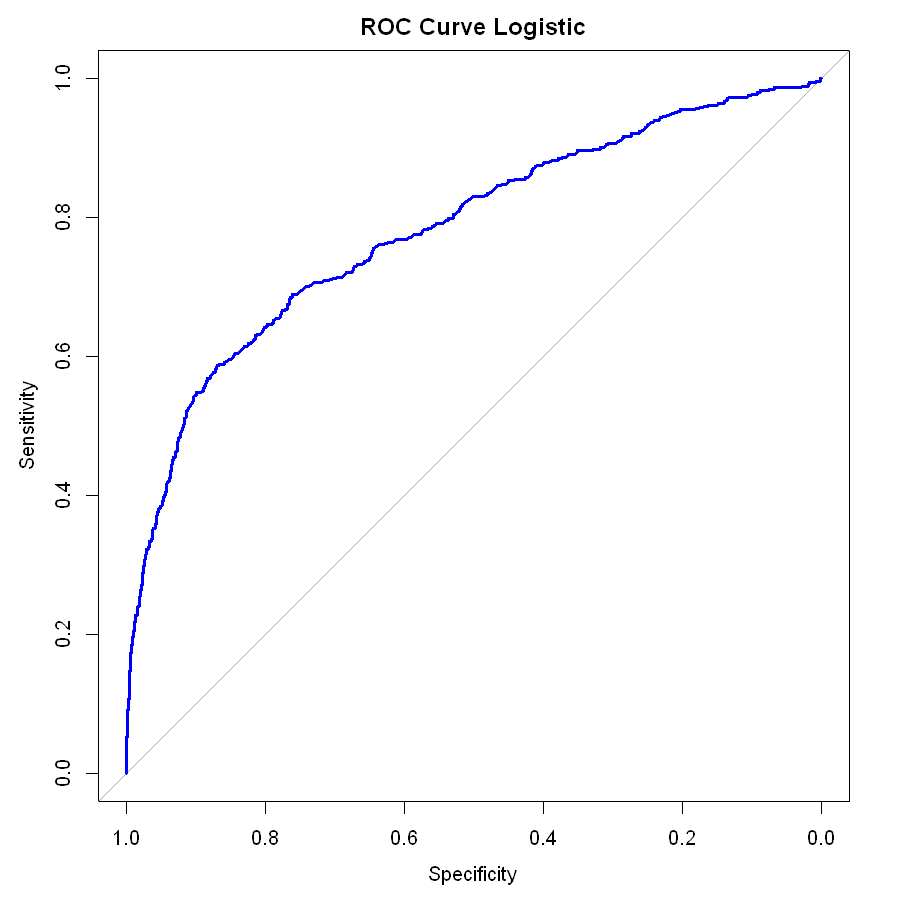

In [359]:
plot(pred_roc,col="blue", lwd=3, main="ROC Curve Logistic")

### Crossvalidation

In [255]:
library(mlr)

In [256]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask(id="bank", data=bank_nc[,c("subscribe",names(log_mod2$coefficients)[-1])], target="subscribe")

# Run the k-fold CV
resample(lnr_logreg, task_logreg, rdesc, measures=list(mlr::auc,mlr::mmce,mlr::acc))

Resampling: cross-validation

Measures:             auc       mmce      acc       

[Resample] iter 1:    0.8196417 0.1165000 0.8835000 

[Resample] iter 2:    0.7512827 0.0970000 0.9030000 

[Resample] iter 3:    0.7972902 0.1000000 0.9000000 

[Resample] iter 4:    0.7977920 0.0880000 0.9120000 

[Resample] iter 5:    0.7525329 0.1065000 0.8935000 

[Resample] iter 6:    0.8254472 0.0925000 0.9075000 

[Resample] iter 7:    0.7747485 0.1065000 0.8935000 

[Resample] iter 8:    0.7997726 0.0950000 0.9050000 

[Resample] iter 9:    0.7793953 0.1065000 0.8935000 

[Resample] iter 10:   0.7540334 0.0955000 0.9045000 




Aggregated Result: auc.test.mean=0.7851936,mmce.test.mean=0.1004000,acc.test.mean=0.8996000






Resample Result
Task: bank
Learner: classif.logreg
Aggr perf: auc.test.mean=0.7851936,mmce.test.mean=0.1004000,acc.test.mean=0.8996000
Runtime: 2.52803

### 2.2. Random Forest

In [257]:
library(randomForest)

In [258]:
which(names(train_nd)=="subscribe")

[1] 19

mtry = 5  OOB error = 10.23% 
Searching left ...
mtry = 4 	OOB error = 10.24% 
-0.0006108735 0.01 
Searching right ...
mtry = 7 	OOB error = 10.36% 
-0.01282834 0.01 


,mtry,OOBError
4.OOB,4,0.1023750
5.OOB,5,0.1023125
7.OOB,7,0.1036250


[1] 5

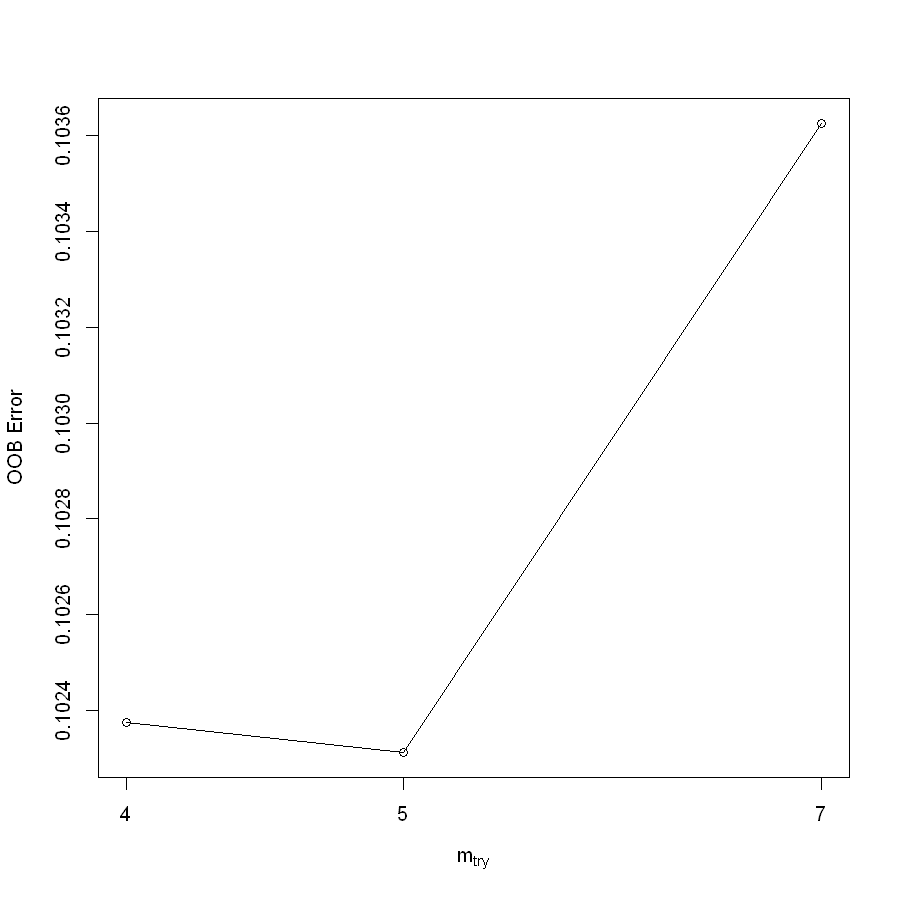

In [259]:
#https://www.listendata.com/2014/11/random-forest-with-r.html#id-82afe7

#get the optimal mtry
mtry <- tuneRF(train_nd[,-19],as.factor(train_nd$subscribe), ntreeTry=500,
               stepFactor=1.5,improve=0.01, trace=TRUE, plot=TRUE)
best.m <- mtry[mtry[, 2] == min(mtry[, 2]), 1]
mtry
best.m

In [260]:
rf_mod <- randomForest(as.factor(subscribe) ~ .,mtry = best.m, data=train_nd, importance=T,ntree=250)
summary(rf_mod)

                Length Class  Mode     
call                6  -none- call     
type                1  -none- character
predicted       16000  factor numeric  
err.rate          750  -none- numeric  
confusion           6  -none- numeric  
votes           32000  matrix numeric  
oob.times       16000  -none- numeric  
classes             2  -none- character
importance        104  -none- numeric  
importanceSD       78  -none- numeric  
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               16000  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

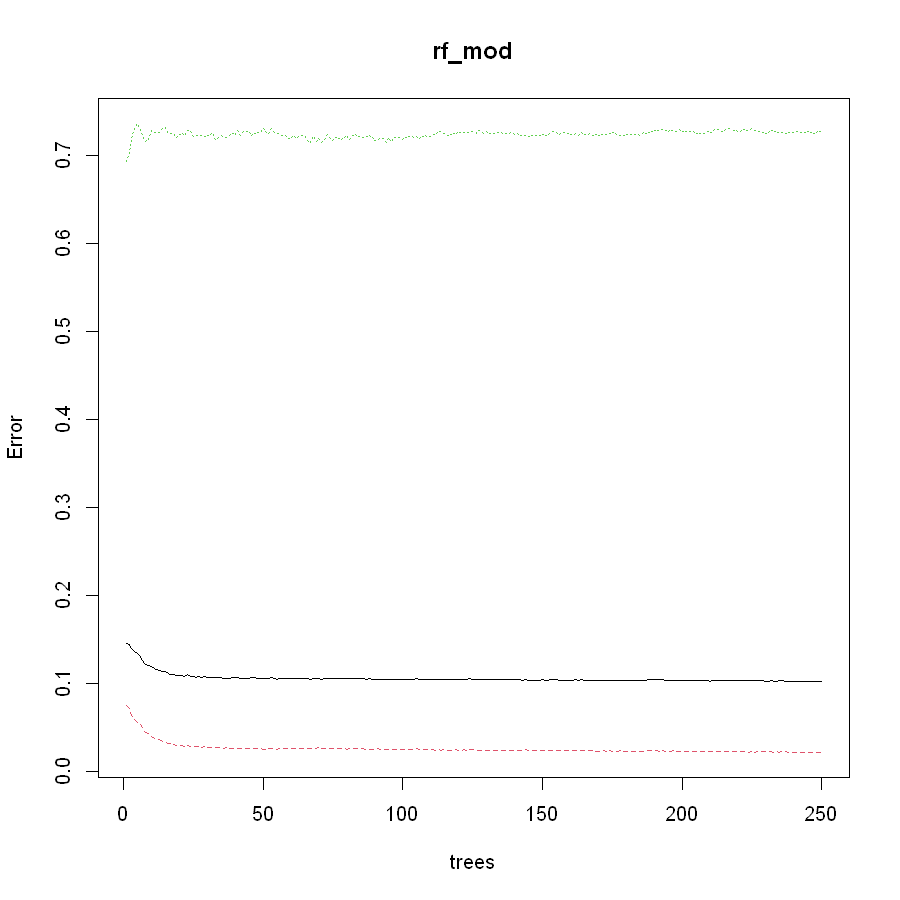

In [263]:
plot(rf_mod)

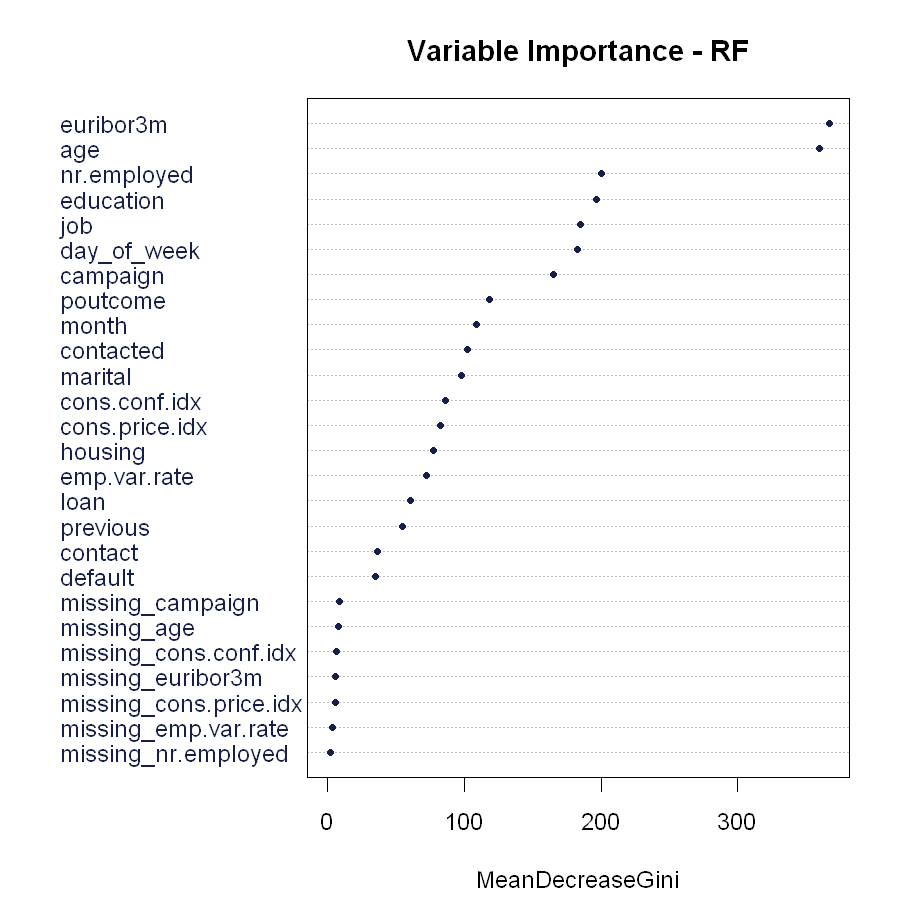

In [264]:
varImpPlot(rf_mod,type=2,pch=20, col="#151f47",cex=1.2,main='Variable Importance - RF')

In [265]:
importance(rf_mod)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
age,16.2902701,2.2517524,16.6271501,359.928249
job,10.9287579,0.8591410,10.2727553,185.001233
marital,6.5534212,-0.0799517,6.1778639,97.932267
education,10.6287195,0.8734696,10.7296366,196.659364
default,6.8334551,-2.9945079,5.8431918,34.762628
housing,2.1047605,-3.4594760,0.2329712,77.449992
loan,2.7236243,2.4919733,3.5266584,60.556816
contact,11.7086609,11.7163293,13.8210161,36.048650
month,17.9888513,-4.3461827,18.1988026,108.836005
day_of_week,15.5350236,2.4684672,15.9896018,183.051854


In [266]:
library(data.table)

In [267]:
var_imp<-data.frame(importance(rf_mod))
var_imp$Var <- row.names(var_imp)
var_imp <- data.table(var_imp)
var_imp<-var_imp[order(MeanDecreaseGini,decreasing=T)] #taking top 14 variable by importance MSE

most_imp<-var_imp$Var[1:17]
most_imp

[1] "euribor3m"      "age"            "nr.employed"    "education"     
 [5] "job"            "day_of_week"    "campaign"       "poutcome"      
 [9] "month"          "contacted"      "marital"        "cons.conf.idx" 
[13] "cons.price.idx" "housing"        "emp.var.rate"   "loan"          
[17] "previous"

In [268]:
rf_mod2 <- randomForest(as.factor(subscribe) ~ .,mtry = best.m, data=train_nd[c("subscribe",most_imp)], importance=T,ntree=250)
summary(rf_mod2)

                Length Class  Mode     
call                6  -none- call     
type                1  -none- character
predicted       16000  factor numeric  
err.rate          750  -none- numeric  
confusion           6  -none- numeric  
votes           32000  matrix numeric  
oob.times       16000  -none- numeric  
classes             2  -none- character
importance         68  -none- numeric  
importanceSD       51  -none- numeric  
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               16000  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [269]:
rf_mod2


Call:
 randomForest(formula = as.factor(subscribe) ~ ., data = train_nd[c("subscribe",      most_imp)], mtry = best.m, importance = T, ntree = 250) 
               Type of random forest: classification
                     Number of trees: 250
No. of variables tried at each split: 5

        OOB estimate of  error rate: 10.56%
Confusion matrix:
      0   1 class.error
0 13800 369  0.02604277
1  1320 511  0.72091753

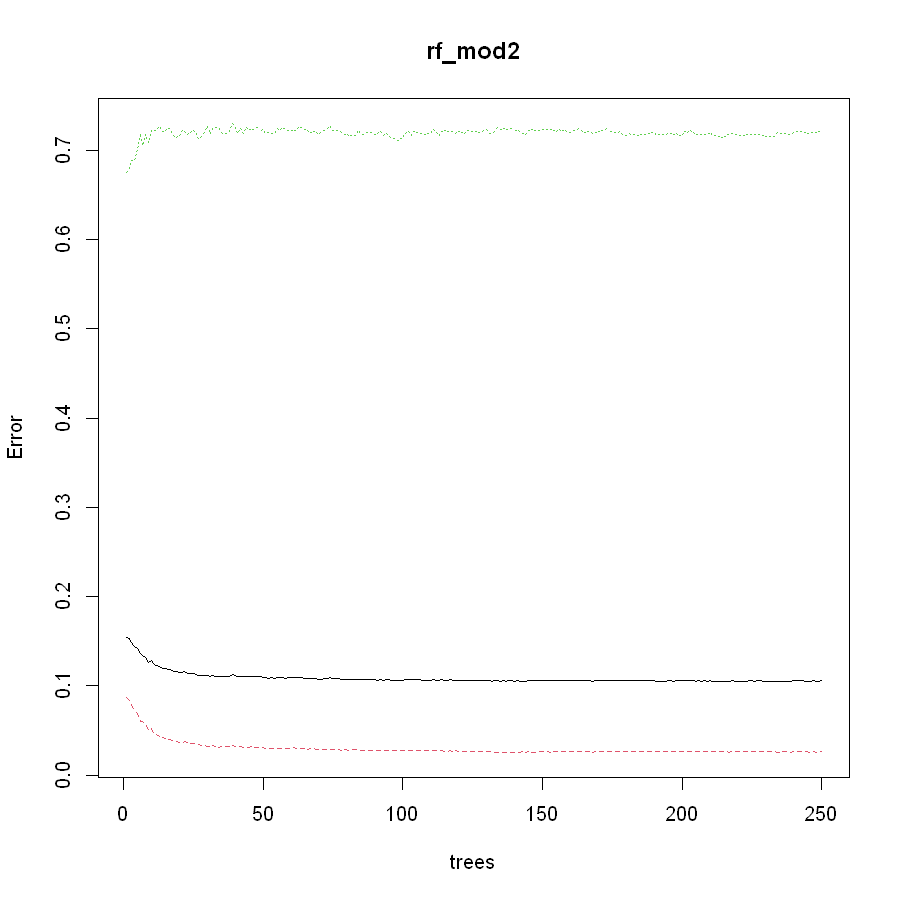

In [270]:
plot(rf_mod2)

In [271]:
#predict on test
rf_pred_prob <- predict(rf_mod2,test_nd,type="prob")[,2]
rf_pred <- predict(rf_mod2,test_nd)
table(rf_pred)

rf_pred
   0    1 
3804  196 

### Evaluation

[1] "Confusion matrix:"


       
rf_pred    0    1
      0 3477  327
      1   83  113

[1] "Accuracy = 0.8975"
[1] "Error = 0.1025"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.7731"


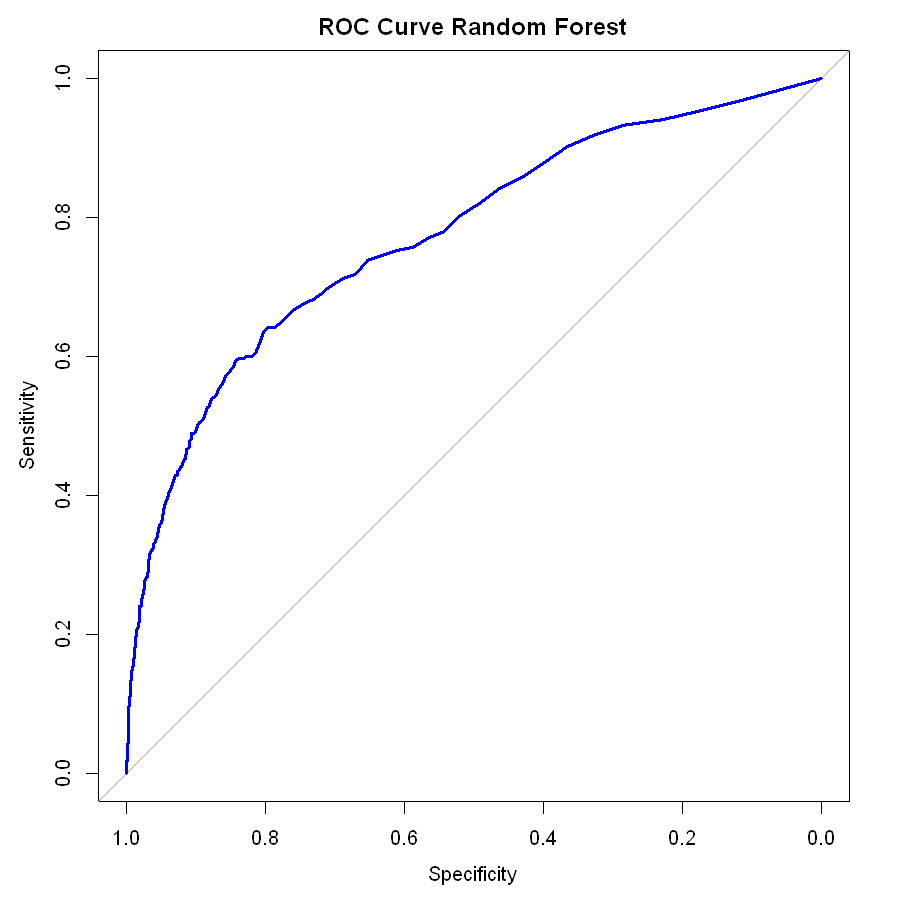

In [272]:
# Confusion matrix
print('Confusion matrix:')
table(rf_pred, test$subscribe)

# Accuracy and error rate
acc <- mean(rf_pred == test$subscribe)
err_rate <- 1 - acc
print(paste('Accuracy =', round(acc, 4)))
print(paste('Error =', round(err_rate, 4)))

# AUC
pred_roc <- pROC::roc(response=as.numeric(test$subscribe==1),predictor = as.numeric(rf_pred_prob))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', round(pred_auc,4)))

options(repr.plot.width=7.5, repr.plot.height=7.5)
plot(pred_roc,col="blue", lwd=3, main="ROC Curve Random Forest")

### Crossvalidation

In [273]:
bank2$subscribe<-as.factor(bank2$subscribe)

In [274]:
str(bank2)

'data.frame':	20000 obs. of  27 variables:
 $ age                   : num  42 35 44 45 45 38 33 38 29 34 ...
 $ job                   : Factor w/ 6 levels "admin.","blue-collar",..: 3 4 6 5 4 6 6 2 2 1 ...
 $ marital               : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 3 3 1 ...
 $ education             : Factor w/ 7 levels "basic.4y","basic.6y",..: 3 7 3 4 5 6 6 3 5 7 ...
 $ default               : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 2 1 1 2 1 1 ...
 $ housing               : Factor w/ 3 levels "no","unknown",..: 1 3 3 3 2 1 1 3 3 3 ...
 $ loan                  : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 2 1 3 1 1 3 ...
 $ contact               : Factor w/ 2 levels "cellular","telephone": 1 2 1 1 2 2 1 2 1 1 ...
 $ month                 : Factor w/ 10 levels "apr","aug","dec",..: 4 5 7 1 7 7 1 7 7 2 ...
 $ day_of_week           : Factor w/ 5 levels "fri","mon","thu",..: 3 2 2 4 5 5 1 5 1 5 ...
 $ campaign              : num  1 4 1 1 1 2 1 1 1 1 ...
 

In [275]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
rf_reg <- makeLearner("classif.randomForest", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_rf <- makeClassifTask(id="bank", data=bank2[c("subscribe",most_imp)], target="subscribe")

# Run the k-fold CV
resample(rf_reg, task_rf, rdesc, measures=list(mlr::auc,mlr::mmce,mlr::acc))

Resampling: cross-validation

Measures:             auc       mmce      acc       

[Resample] iter 1:    0.7819287 0.1090000 0.8910000 

[Resample] iter 2:    0.7807934 0.0970000 0.9030000 

[Resample] iter 3:    0.7652340 0.1045000 0.8955000 

[Resample] iter 4:    0.7777134 0.1115000 0.8885000 

[Resample] iter 5:    0.7819053 0.1060000 0.8940000 

[Resample] iter 6:    0.7423277 0.0980000 0.9020000 

[Resample] iter 7:    0.7723729 0.0965000 0.9035000 

[Resample] iter 8:    0.7645231 0.1040000 0.8960000 

[Resample] iter 9:    0.7968189 0.1060000 0.8940000 

[Resample] iter 10:   0.7856058 0.0995000 0.9005000 




Aggregated Result: auc.test.mean=0.7749223,mmce.test.mean=0.1032000,acc.test.mean=0.8968000






Resample Result
Task: bank
Learner: classif.randomForest
Aggr perf: auc.test.mean=0.7749223,mmce.test.mean=0.1032000,acc.test.mean=0.8968000
Runtime: 477.82

### 2.3. LDA

In [276]:
lda_mod<- lda(subscribe~., data=train)
lda_mod

Call:
lda(subscribe ~ ., data = train)

Prior probabilities of groups:
        0         1 
0.8855625 0.1144375 

Group means:
       age campaign  previous emp.var.rate cons.price.idx cons.conf.idx
0 39.92820 2.538495 0.1274614    0.2691038       93.60910     -40.56402
1 41.01036 2.057271 0.4991808   -1.2315529       93.34429     -39.77962
  euribor3m nr.employed missing_age missing_campaign missing_emp.var.rate
0  3.836969    5177.084 0.010021879      0.010939375          0.008963230
1  2.139605    5096.204 0.009830694      0.009284544          0.008192245
  missing_cons.price.idx missing_cons.conf.idx missing_euribor3m
0             0.00875150            0.01009246        0.01072764
1             0.01092299            0.01201529        0.01201529
  missing_nr.employed contacted poutcome_nonexistent poutcome_success
0         0.009033806 0.9845437            0.8915237       0.01390359
1         0.006007646 0.7809940            0.6717641       0.20262152
  day_of_week_mon day_of_week_

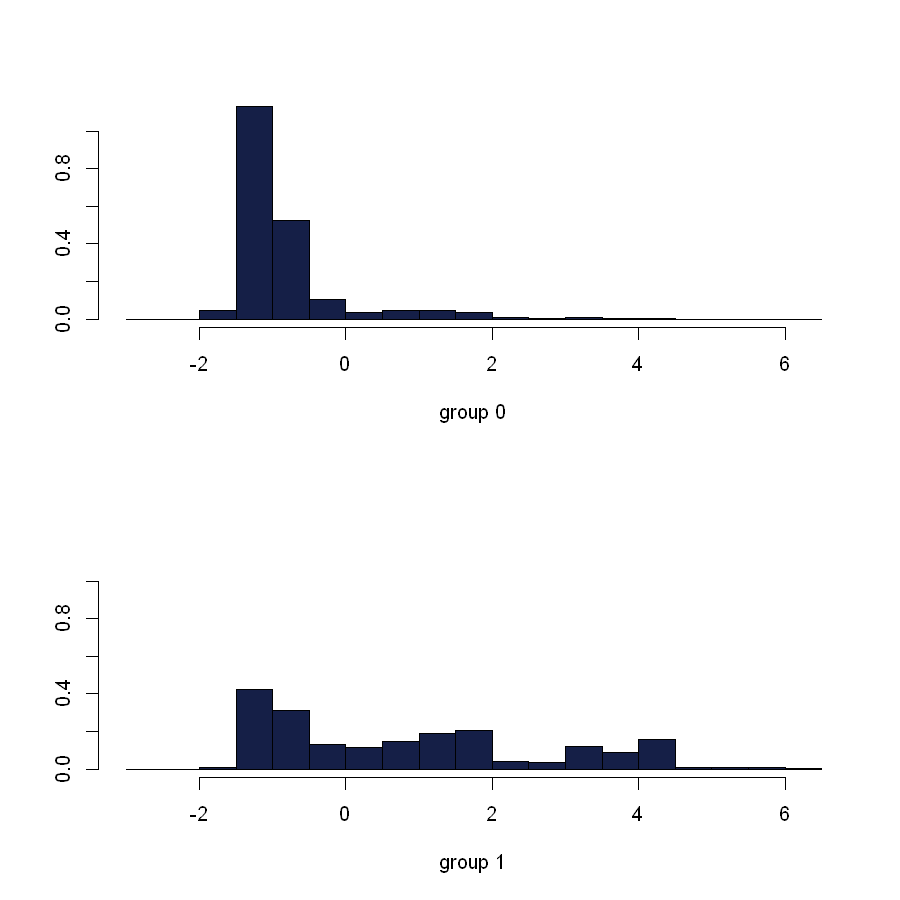

In [277]:
plot(lda_mod,col="#151f47")

In [278]:
library(caret)

In [279]:
#install.packages("klaR")
library(klaR)

In [280]:
#https://stackoverflow.com/questions/32159649/steplda-without-cross-validation
set.seed(42)

c_1 <- trainControl(method = "none")
maxvar <- 25 
direction <- "backward"
tune_1 <- data.frame(maxvar,direction)
tr <- caret::train(as.factor(subscribe)~., data=train, method = "stepLDA", trControl=c_1, tuneGrid=tune_1)
tr

 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.

16000 observations of 52 variables in 2 classes; direction: backward

stop criterion: assemble 25 best variables.



correctness rate: 0.8885;  starting variables (52): age, campaign, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, missing_age, missing_campaign, missing_emp.var.rate, missing_cons.price.idx, missing_cons.conf.idx, missing_euribor3m, missing_nr.employed, contacted, poutcome_nonexistent, poutcome_success, day_of_week_mon, day_of_week_thu, day_of_week_tue, day_of_week_wed, month_aug, month_dec, month_jul, month_jun, month_mar, month_may, month_nov, month_oct, month_sep, contact_telephone, loan_unknown, loan_yes, housing_unknown, housing_yes, default_unknown, default_yes, education_basic.6y, education_basic.9y, education_high.school, education_others, education_professional.course, education_university.degree, marital_married, marital_single, marital_unknown, job_blue_collar, job_management, job_others, job_services, job_technician 
correctness rate: 0.89081;  out: "nr.employed";  variables (51): age, campaign, previous, emp.var.rate, cons.price.idx, cons.co

Linear Discriminant Analysis with Stepwise Feature Selection 

16000 samples
   52 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: None 

In [281]:
tr$finalModel

method      : lda 
final model : y ~ age + campaign + previous + emp.var.rate + cons.price.idx + 
    cons.conf.idx + euribor3m + missing_age + missing_campaign + 
    missing_emp.var.rate + missing_cons.price.idx + missing_cons.conf.idx + 
    missing_euribor3m + missing_nr.employed + contacted + poutcome_nonexistent + 
    poutcome_success + day_of_week_mon + day_of_week_thu + day_of_week_tue + 
    day_of_week_wed + month_aug + month_dec + month_jul + month_jun + 
    month_mar + month_may + month_nov + month_oct + month_sep + 
    contact_telephone + loan_unknown + loan_yes + housing_unknown + 
    housing_yes + default_unknown + default_yes + education_basic.6y + 
    education_basic.9y + education_high.school + education_others + 
    education_professional.course + education_university.degree + 
    marital_married + marital_single + marital_unknown + job_blue_collar + 
    job_management + job_others + job_services + job_technician
<environment: 0x000000002f58e018>

correctness

In [282]:
unsel_var <- c('nr.employed')

In [285]:
lda_mod2<- lda(as.factor(subscribe)~age + campaign + previous + emp.var.rate + cons.price.idx + 
    cons.conf.idx + euribor3m + missing_age + missing_campaign + 
    missing_emp.var.rate + missing_cons.price.idx + missing_cons.conf.idx + 
    missing_euribor3m + missing_nr.employed + contacted + poutcome_nonexistent + 
    poutcome_success + day_of_week_mon + day_of_week_thu + day_of_week_tue + 
    day_of_week_wed + month_aug + month_dec + month_jul + month_jun + 
    month_mar + month_may + month_nov + month_oct + month_sep + 
    contact_telephone + loan_unknown + loan_yes + housing_unknown + 
    housing_yes + default_unknown + default_yes + education_basic.6y + 
    education_basic.9y + education_high.school + education_others + 
    education_professional.course + education_university.degree + 
    marital_married + marital_single + marital_unknown + job_blue_collar + 
    job_management + job_others + job_services + job_technician, data=train)
lda_mod2

Call:
lda(as.factor(subscribe) ~ age + campaign + previous + emp.var.rate + 
    cons.price.idx + cons.conf.idx + euribor3m + missing_age + 
    missing_campaign + missing_emp.var.rate + missing_cons.price.idx + 
    missing_cons.conf.idx + missing_euribor3m + missing_nr.employed + 
    contacted + poutcome_nonexistent + poutcome_success + day_of_week_mon + 
    day_of_week_thu + day_of_week_tue + day_of_week_wed + month_aug + 
    month_dec + month_jul + month_jun + month_mar + month_may + 
    month_nov + month_oct + month_sep + contact_telephone + loan_unknown + 
    loan_yes + housing_unknown + housing_yes + default_unknown + 
    default_yes + education_basic.6y + education_basic.9y + education_high.school + 
    education_others + education_professional.course + education_university.degree + 
    marital_married + marital_single + marital_unknown + job_blue_collar + 
    job_management + job_others + job_services + job_technician, 
    data = train)

Prior probabilities of groups

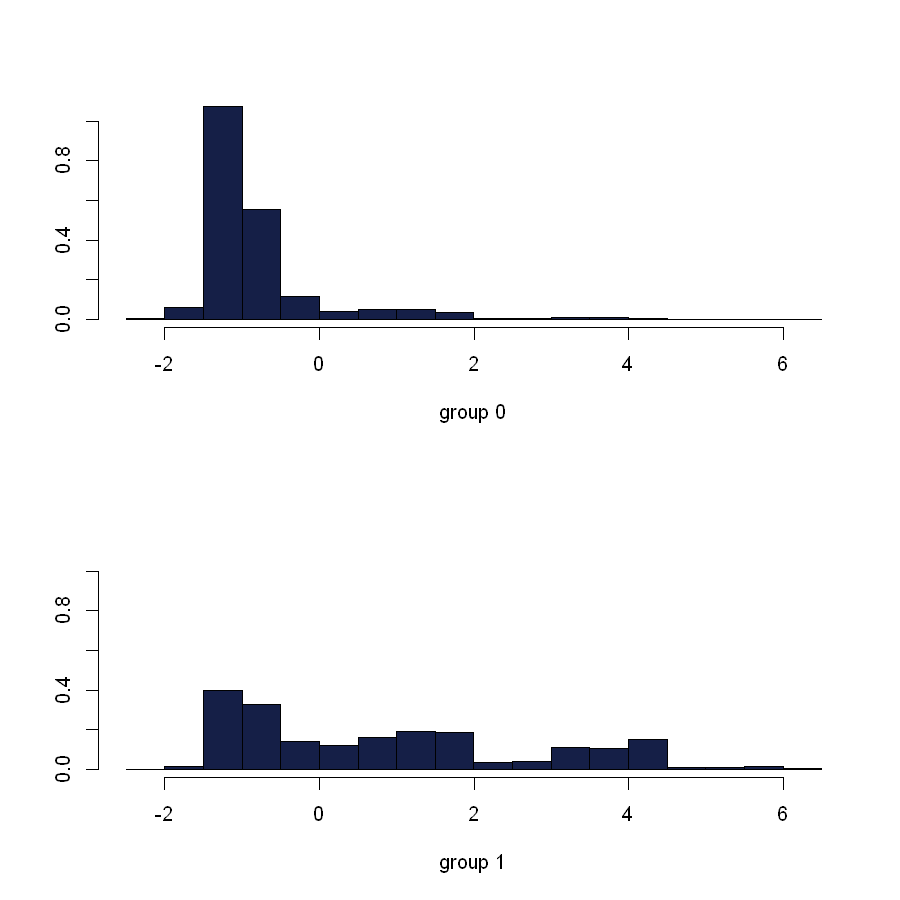

In [366]:
plot(lda_mod2,col="#151f47")

In [286]:
#predict on test
lda_pred_prob <- predict(lda_mod2,test)$posterior[,2]
lda_pred <- predict(lda_mod2,test)$class
table(lda_pred)

lda_pred
   0    1 
3690  310 

### Evaluation

[1] "Confusion matrix:"


        
lda_pred    0    1
       0 3411  279
       1  149  161

[1] "Accuracy = 0.893"
[1] "Error = 0.107"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.7839"


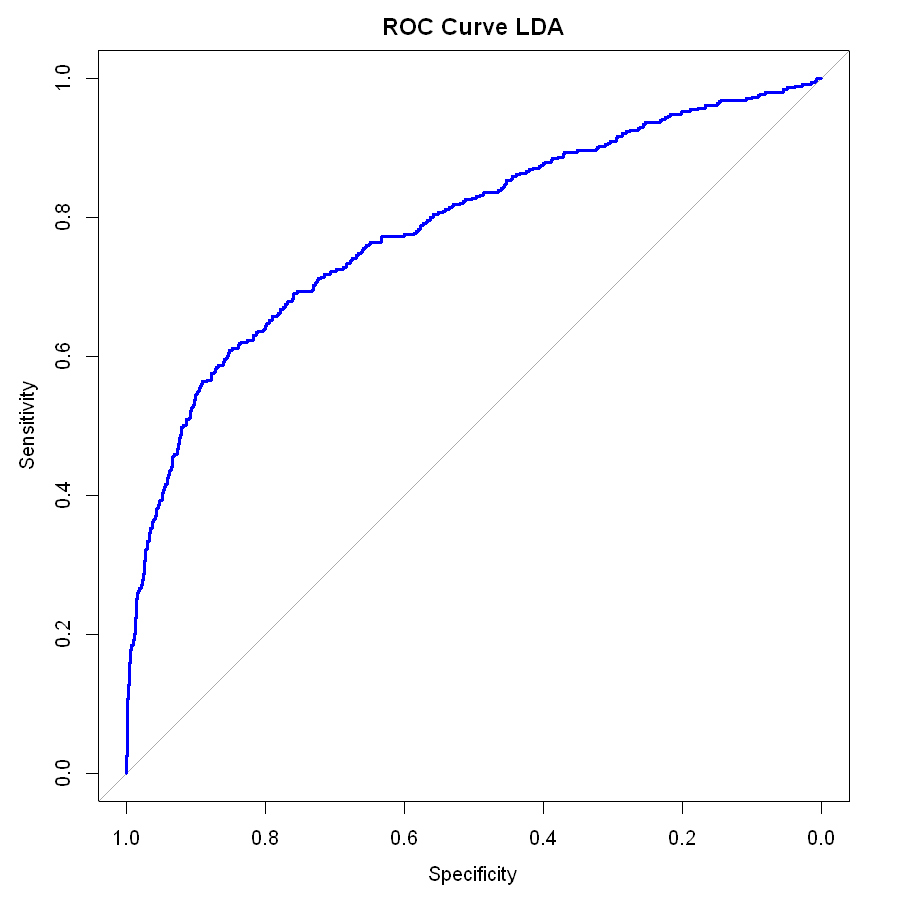

In [287]:
# Confusion matrix
print('Confusion matrix:')
table(lda_pred, test$subscribe)

# Accuracy and error rate
acc <- mean(lda_pred == test$subscribe)
err_rate <- 1 - acc
print(paste('Accuracy =', round(acc, 4)))
print(paste('Error =', round(err_rate, 4)))

# AUC
pred_roc <- pROC::roc(response=as.numeric(test$subscribe==1),predictor = as.numeric(lda_pred_prob))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', round(pred_auc,4)))

options(repr.plot.width=7.5, repr.plot.height=7.5)
plot(pred_roc,col="blue", lwd=3, main="ROC Curve LDA")

### Crossvalidation

In [367]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_lda <- makeLearner("classif.lda", predict.type="prob", fix.factors.prediction=T)

# Define the task
task_logreg <- makeClassifTask(id="bank", data=bank_nc[,!names(bank_nc)%in%unsel_var], target="subscribe")

# Run the k-fold CV
resample(lnr_lda, task_logreg, rdesc, measures=list(mlr::auc,mlr::mmce,mlr::acc))

Resampling: cross-validation

Measures:             auc       mmce      acc       

[Resample] iter 1:    0.7763909 0.1280000 0.8720000 

[Resample] iter 2:    0.8064898 0.1045000 0.8955000 

[Resample] iter 3:    0.7764041 0.1155000 0.8845000 

[Resample] iter 4:    0.7485414 0.1195000 0.8805000 

[Resample] iter 5:    0.7926690 0.1040000 0.8960000 

[Resample] iter 6:    0.7874937 0.1000000 0.9000000 

[Resample] iter 7:    0.7523022 0.1055000 0.8945000 

[Resample] iter 8:    0.7636818 0.1085000 0.8915000 

[Resample] iter 9:    0.7916285 0.1020000 0.8980000 

[Resample] iter 10:   0.7877021 0.1055000 0.8945000 




Aggregated Result: auc.test.mean=0.7783303,mmce.test.mean=0.1093000,acc.test.mean=0.8907000






Resample Result
Task: bank
Learner: classif.lda
Aggr perf: auc.test.mean=0.7783303,mmce.test.mean=0.1093000,acc.test.mean=0.8907000
Runtime: 6.30121

### 2.4. Decision Tree

In [289]:
library(rpart)
library(rpart.plot)


Classification tree:
rpart(formula = as.factor(subscribe) ~ ., data = train_nd, control = rpart.control(cp = 1e-36))

Variables actually used in tree construction:
 [1] age            campaign       cons.price.idx contact        contacted     
 [6] day_of_week    default        education      emp.var.rate   euribor3m     
[11] housing        job            loan           marital        month         
[16] nr.employed    previous      

Root node error: 1831/16000 = 0.11444

n= 16000 

           CP nsplit rel error  xerror     xstd
1  5.8165e-02      0   1.00000 1.00000 0.021992
2  4.0051e-03      2   0.88367 0.88749 0.020868
3  3.2769e-03      7   0.86019 0.89459 0.020942
4  2.8673e-03     10   0.85035 0.89514 0.020948
5  2.4577e-03     14   0.83889 0.89132 0.020908
6  2.1846e-03     16   0.83397 0.89077 0.020902
7  1.6384e-03     19   0.82742 0.89514 0.020948
8  1.4564e-03     30   0.80721 0.90825 0.021083
9  1.3654e-03     33   0.80284 0.90879 0.021088
10 1.0923e-03     37   0.7973

Warning message in rsq.rpart(tree_mod):
"may not be applicable for this method"


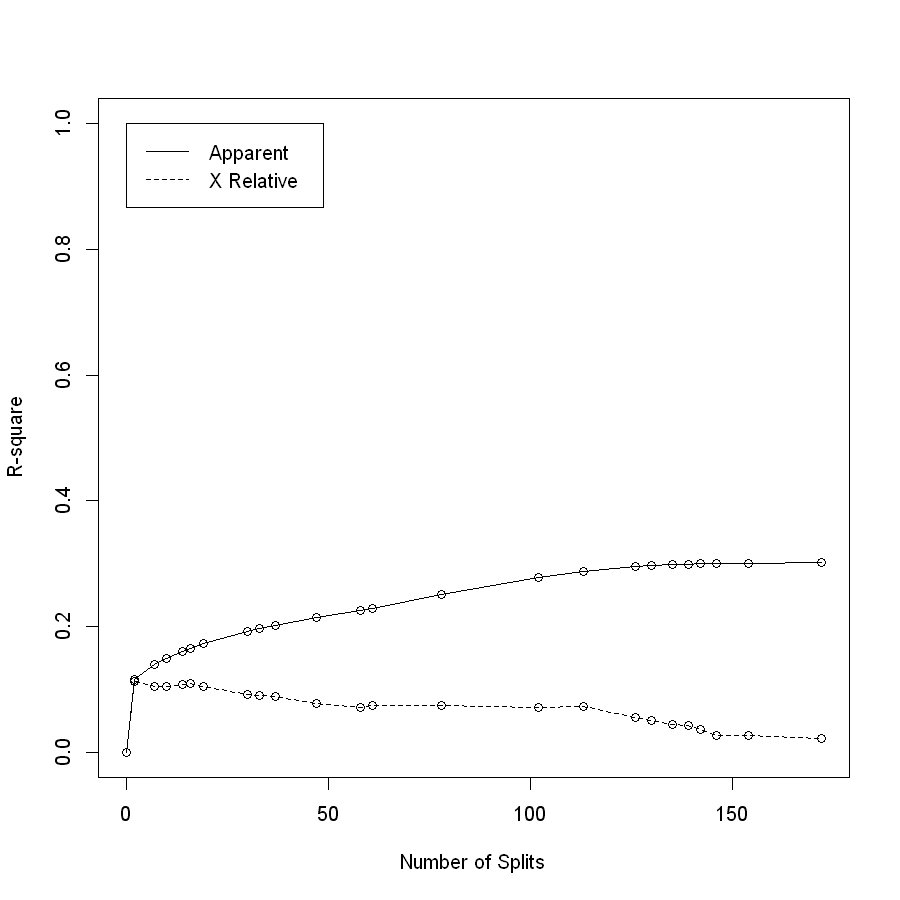

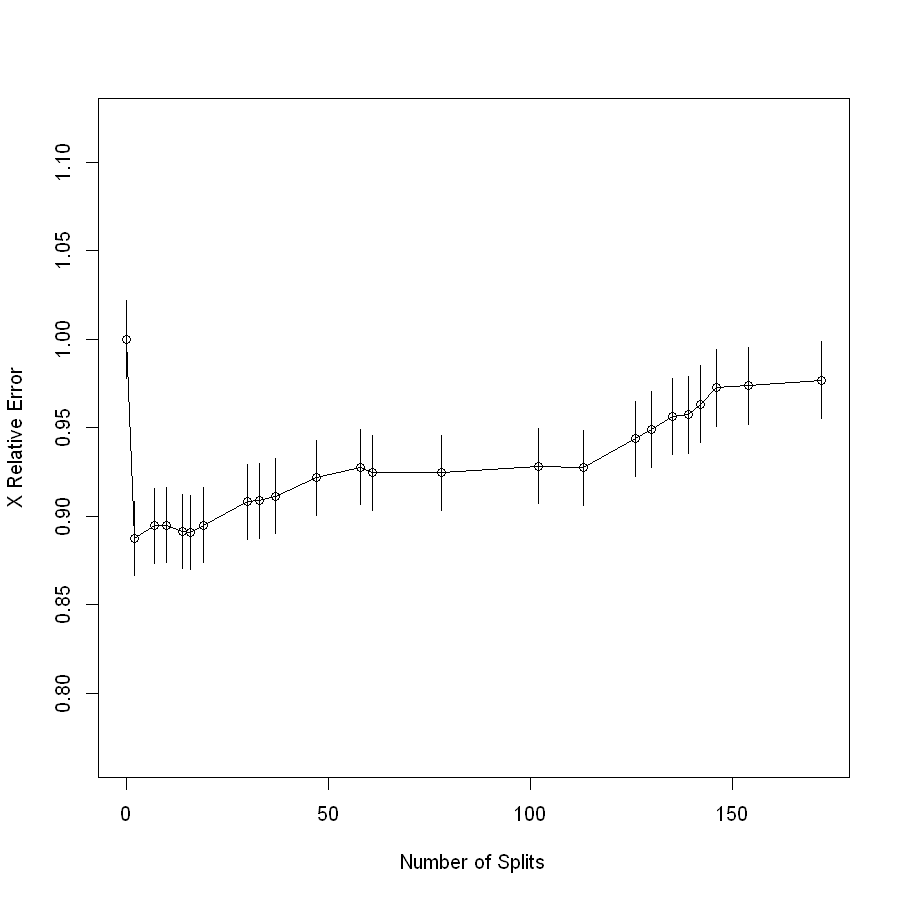

In [290]:
tree_mod<-rpart(as.factor(subscribe) ~.,data=train_nd,control=rpart.control(cp=1e-36))
rsq.rpart(tree_mod)

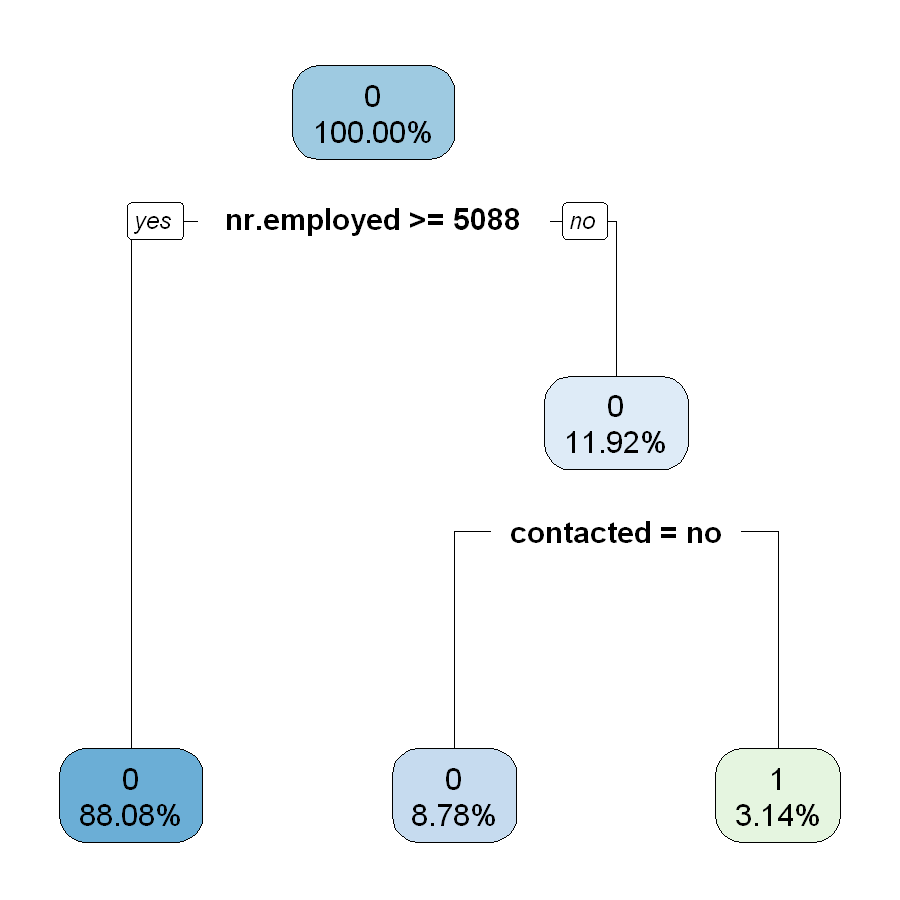

In [363]:
ptree_mod <- prune(tree_mod,cp=tree_mod$cptable[which.min(tree_mod$cptable[,4]),1])
#rsq.rpart(ptree_mod)
rpart.plot(ptree_mod,extra=100,cex=1.5,digits = 4)

In [364]:
#predict on test
tree_pred_prob <- predict(ptree_mod,test_nd,type="prob")
tree_pred <- ifelse(tree_pred_prob[,1]>0.5,0,1)
table(tree_pred)

tree_pred
   0    1 
3895  105 

### Evaluation

[1] "Confusion matrix:"


         
tree_pred    0    1
        0 3532  363
        1   28   77

[1] "Accuracy = 0.9022"
[1] "Error = 0.0978"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.7013"


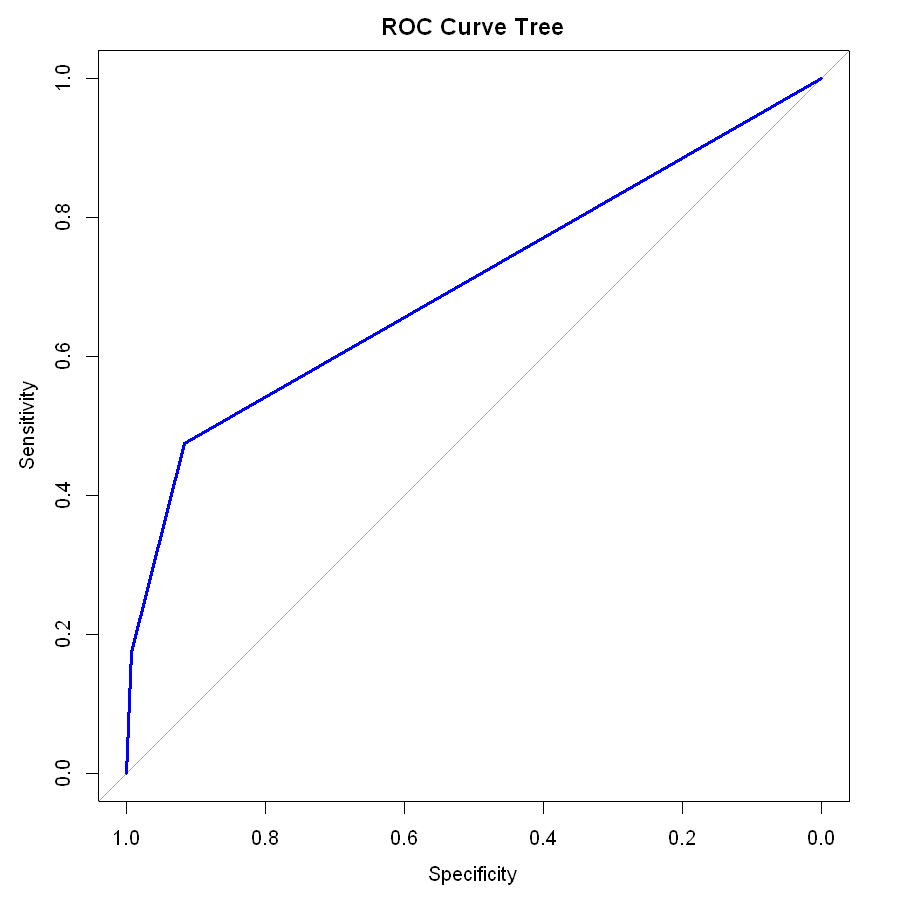

In [365]:
# Confusion matrix
print('Confusion matrix:')
table(tree_pred, test$subscribe)

# Accuracy and error rate
acc <- mean(tree_pred == test$subscribe)
err_rate <- 1 - acc
print(paste('Accuracy =', round(acc, 4)))
print(paste('Error =', round(err_rate, 4)))

# AUC
pred_roc <- pROC::roc(response=as.numeric(test$subscribe==1),predictor = as.numeric(tree_pred_prob[,2]))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', round(pred_auc,4)))

options(repr.plot.width=7.5, repr.plot.height=7.5)
plot(pred_roc,col="blue", lwd=3, main="ROC Curve Tree")

### Crossvalidation

In [294]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_tree <- makeLearner("classif.rpart", predict.type="prob", fix.factors.prediction=F)

# Define the task
task_logreg <- makeClassifTask(id="bank", data=bank2, target="subscribe")

# Run the k-fold CV
resample(lnr_tree, task_logreg, rdesc, measures=list(mlr::auc,mlr::mmce,mlr::acc))

Resampling: cross-validation

Measures:             auc       mmce      acc       

[Resample] iter 1:    0.7133962 0.1060000 0.8940000 

[Resample] iter 2:    0.7380172 0.0980000 0.9020000 

[Resample] iter 3:    0.6834185 0.0895000 0.9105000 

[Resample] iter 4:    0.6850243 0.0955000 0.9045000 

[Resample] iter 5:    0.7252674 0.1135000 0.8865000 

[Resample] iter 6:    0.7104503 0.1015000 0.8985000 

[Resample] iter 7:    0.6804285 0.1090000 0.8910000 

[Resample] iter 8:    0.7178422 0.1005000 0.8995000 

[Resample] iter 9:    0.7091225 0.0925000 0.9075000 

[Resample] iter 10:   0.6704763 0.1015000 0.8985000 




Aggregated Result: auc.test.mean=0.7033443,mmce.test.mean=0.1007500,acc.test.mean=0.8992500






Resample Result
Task: bank
Learner: classif.rpart
Aggr perf: auc.test.mean=0.7033443,mmce.test.mean=0.1007500,acc.test.mean=0.8992500
Runtime: 3.59084

### 2.5. KNN

In [295]:
library(class)

In [296]:
pred_knn <- knn(train=train_s[, -8], test=test_s[, -8], cl=train_s$subscribe, k=1)
summary(pred_knn)

0    1 
3687  313

In [297]:
cont <- trainControl(method="cv",number = 10)
knn_mod <- train(as.factor(subscribe) ~.,data = train_s, method = "knn",trControl = cont)
knn_mod

k-Nearest Neighbors 

16000 samples
   52 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 14400, 14400, 14400, 14400, 14399, 14400, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.8890629  0.3051080
  7  0.8911875  0.3087654
  9  0.8919375  0.3076308

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

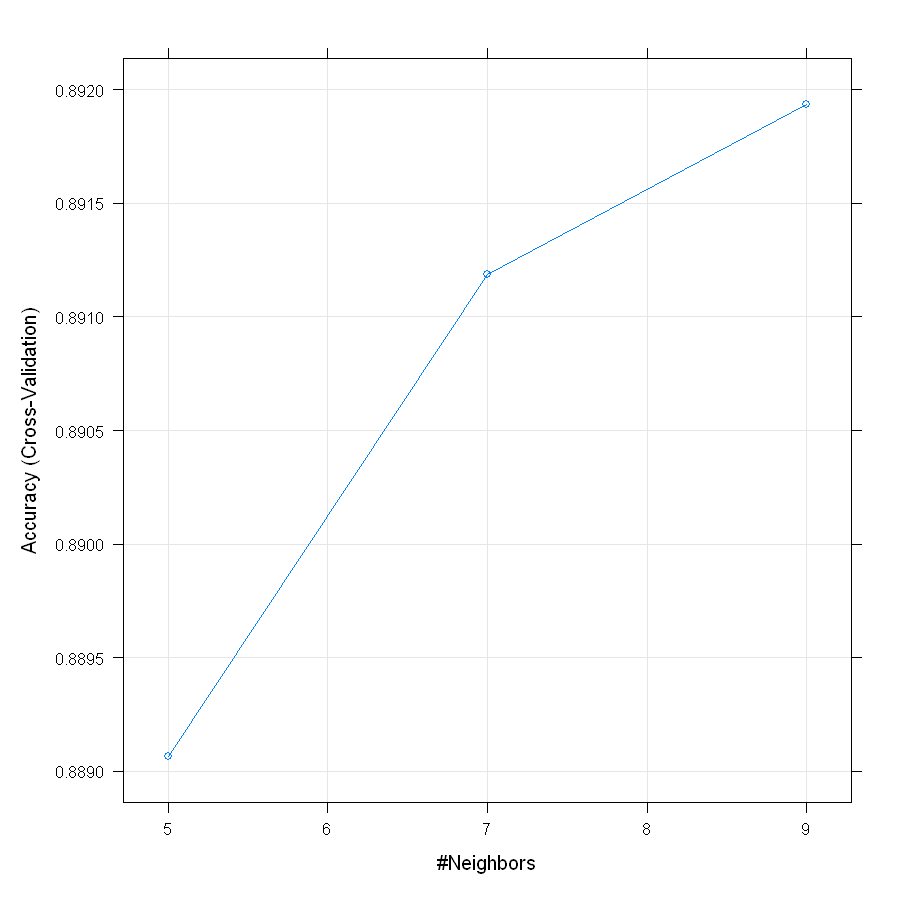

In [368]:
plot(knn_mod)

In [299]:
table(predict(knn_mod,test_s))


   0    1 
3775  225 

In [300]:
# #try to get the best k
# AUC<-vector()
# for (i in 1:10){
#     pred_knn <- knn(train=train_s[, -8], test=test_s[, -8], cl=train_s$subscribe, k=i)
#     pred_roc <- pROC::roc(response=as.numeric(test$subscribe==1),predictor = as.numeric(pred_knn))
#     AUC[i]<- pROC::auc(pred_roc)
#     print(paste("K=",i," AUC:",pROC::auc(pred_roc)))
# }
# which.max(AUC) #4

In [301]:
names(train_s)[8]

[1] "nr.employed"

In [376]:
pred_knn_f <- knn(train=train_s[, -8], test=test_s[, -8], cl=train_s$subscribe, k=9,prob = TRUE)

In [377]:
mean(pred_knn_f == test$subscribe)
table(pred_knn_f,test$subscribe)
table(pred_knn_f)

[1] 0.938

          
pred_knn_f    0    1
         0 3538  226
         1   22  214

pred_knn_f
   0    1 
3764  236 

### Evaluation

[1] "Confusion matrix:"


          
pred_knn_f    0    1
         0 3538  226
         1   22  214

[1] "Accuracy = 0.938"
[1] "Error = 0.062"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.7401"


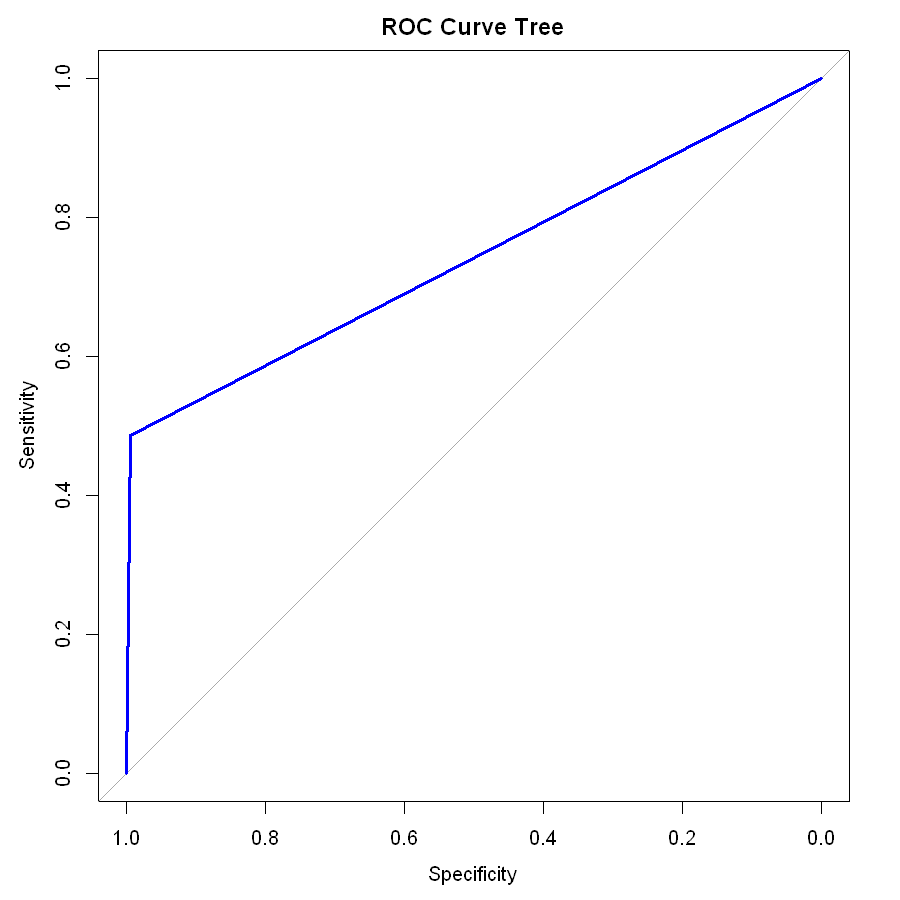

In [381]:
# Confusion matrix
print('Confusion matrix:')
table(pred_knn_f, test_s$subscribe)

# Accuracy and error rate
acc <- mean(pred_knn_f == test_s$subscribe)
err_rate <- 1 - acc
print(paste('Accuracy =', round(acc, 4)))
print(paste('Error =', round(err_rate, 4)))

# AUC
pred_roc <- pROC::roc(response=as.numeric(test_s$subscribe==1),predictor = as.numeric((pred_knn_f)))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', round(pred_auc,4)))

options(repr.plot.width=7.5, repr.plot.height=7.5)
plot(pred_roc,col="blue", lwd=3, main="ROC Curve Tree")

### Crossvalidation

In [309]:
#install.packages("kknn")

In [379]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=9)

# Define the task
task_logreg <- makeClassifTask(id="bank", data=bank_nc_s, target="subscribe")

# Run the k-fold CV
resample(lnr_knn, task_logreg, rdesc, measures=list(mlr::auc,mlr::mmce,mlr::acc))

Resampling: cross-validation

Measures:             auc       mmce      acc       

[Resample] iter 1:    0.7249472 0.1130000 0.8870000 

[Resample] iter 2:    0.7351111 0.1030000 0.8970000 

[Resample] iter 3:    0.7232093 0.1250000 0.8750000 

[Resample] iter 4:    0.7451624 0.0970000 0.9030000 

[Resample] iter 5:    0.7313543 0.1180000 0.8820000 

[Resample] iter 6:    0.7316330 0.1075000 0.8925000 

[Resample] iter 7:    0.7255154 0.1155000 0.8845000 

[Resample] iter 8:    0.7047147 0.1140000 0.8860000 

[Resample] iter 9:    0.7174304 0.1110000 0.8890000 

[Resample] iter 10:   0.7241146 0.1315000 0.8685000 




Aggregated Result: auc.test.mean=0.7263192,mmce.test.mean=0.1135500,acc.test.mean=0.8864500






Resample Result
Task: bank
Learner: classif.kknn
Aggr perf: auc.test.mean=0.7263192,mmce.test.mean=0.1135500,acc.test.mean=0.8864500
Runtime: 18.5325

In [382]:
write.csv(bank2,"BANK_BASE_TABLE_NO_DUM.csv",row.names=F)
write.csv(bank_nc,"BANK_BASE_TABLE_DUM.csv",row.names=F)
write.csv(bank_nc_s,"BANK_BASE_TABLE_DUM_SCALED.csv",row.names=F)